## 1. **`Business Understanding`**
#### 1.1 **`Project Background`**

Imagine you're a small business owner who relies on a website to manage customer relationships, handle transactions, and communicate with clients. Like many users, you’re constantly online—navigating links from emails, social media, and suppliers. But as your business grows, so does the threat landscape around you. Cybercriminals are getting smarter, and phishing attacks are more sophisticated than ever, often hiding behind seemingly legitimate URLs. One wrong click, and you could be handing over sensitive data, from financial details to client information, putting your business and customers at serious risk.

This project aims to develop a machine learning model that can detect phishing URLs and deploy it as a web application, allowing users to input a URL and receive an immediate classification as either phishing or legitimate. By providing this accessible tool, we aim to help users avoid phishing scams and protect sensitive information.

#### `1.2 Business Objectives`

The main objectives of this project include:
- ***High-Accuracy Phishing Detection***: Build a model that reliably distinguishes between phishing and legitimate URLs with an accuracy rate above 90%.
- ***User-Friendly Web Deployment***: Deploy the model as an intuitive web-based application where users can paste URLs and receive instant feedback, making it accessible to users without technical expertise.
- ***Real-Time Classification***: Ensure the web application provides classifications in real-time to minimize delays and improve usability.

#### 1.3 Stakeholders

The primary stakeholders involved in and impacted by this project are:
- ***Business Users***: Owners, employees, and administrators who frequently navigate emails and online transactions and need a way to verify URLs for security.
- ***Individual Users (General Public)***: Everyday internet users who want a quick, reliable way to avoid phishing attacks and protect their personal data.
- ***Cybersecurity Teams***: Professionals in organizations who may incorporate this tool as part of a broader security protocol to preempt phishing threats.

#### 1.4 Success Criteria & Key Performance Indicators

To gauge the success of this project, we will track the following metrics:
- ***Model Accuracy***: Achieve a minimum accuracy of 90% on test data, aiming for a high true-positive rate (correctly identifying phishing URLs).
- ***False Positive Rate***: Maintain a low false-positive rate to avoid incorrectly labeling legitimate URLs as phishing, which could decrease user trust.
- ***Response Time***: Ensure URL classifications are provided within 1-2 seconds to optimize user experience.

#### 1.5 Expected Business Impact
- Financial Protection: Minimizes the risk of financial loss from phishing scams, especially for small businesses and individuals.
- Improved User Trust and Confidence: Builds user trust by offering a reliable tool for verifying URL safety.
- Enhanced Cybersecurity Strategy: Adds an additional layer of security to prevent phishing attacks, which is beneficial for organizations incorporating this tool into their cybersecurity protocols.

## 2. `Data Understanding`

#### 2.1 Initial Data Exploration
The dataset we have is from ***Mendely*** accessible here: https://data.mendeley.com/datasets/kvpkc4j658/1

In [65]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Read the benign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Train/benign_Train.txt', 'r') as benign_train:
    # Read the content and split into lines
    benign_train = benign_train.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
benign_df = pd.DataFrame(benign_train, columns=['url'])

# Display the DataFrame
print(benign_df.head())


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
benign_df['label'] = 'benign'
benign_df.head()

,url,label
0,karens-krazy-korner.blogspot.com/2010/,benign
1,www.tmentertainment.com/ccount/click.php?id=173,benign
2,asian.videos.xblog.in/thai-wife-get-fuck-by-hu...,benign
3,kpn.se/resurser/bilder-att-farglagga,benign
4,www.indokitay.ru/landing/toniki-aasha-herbals/,benign


In [ ]:
# Read the malign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Train/malign_Train.txt', 'r') as malign_train:
    # Read the content and split into lines
    malign_train = malign_train.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
malign_df = pd.DataFrame(malign_train, columns=['url'])

# Display the DataFrame
print(malign_df.head())


                                                url
0                    bosquedarobina.blogspot.com.au
1                                   get.aknigi.club
2  amazon.com/experiment-adrien-brody/dp/b003vel9ei
3                          sexymaryjane.blogspot.be
4                             linkfreak.blogspot.de


In [ ]:
malign_df['label'] = 'malignant'
malign_df.head()

,url,label
0,bosquedarobina.blogspot.com.au,malignant
1,get.aknigi.club,malignant
2,amazon.com/experiment-adrien-brody/dp/b003vel9ei,malignant
3,sexymaryjane.blogspot.be,malignant
4,linkfreak.blogspot.de,malignant


In [ ]:
# Read the benign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Test/benign_Test.txt', 'r') as benign_test:
    # Read the content and split into lines
    benign_test_urls = benign_test.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
benign_test_df = pd.DataFrame(benign_test_urls, columns=['url'])

# Display the DataFrame
print(benign_test_df.head())


                                                 url
0  eijikiriyama.com/tag/%e7%a8%8e%e7%90%86%e5%a3%ab/
1  terrasunt24.de/kfz-halter-halterung-hr-mfm-fur...
2  english.china.com/news/china/54/20170721/10265...
3         sufriche.blogspot.com/2016/11/velas-i.html
4  keymakeup061.blogspot.com/2016/03/arrowhead-20...


In [ ]:
benign_test_df['label'] = 'benign'
benign_test_df.head()

,url,label
0,eijikiriyama.com/tag/%e7%a8%8e%e7%90%86%e5%a3%ab/,benign
1,terrasunt24.de/kfz-halter-halterung-hr-mfm-fur...,benign
2,english.china.com/news/china/54/20170721/10265...,benign
3,sufriche.blogspot.com/2016/11/velas-i.html,benign
4,keymakeup061.blogspot.com/2016/03/arrowhead-20...,benign


In [ ]:
# Read the malign URLs from the text file
with open('/content/drive/MyDrive/Phishing Website Detection Dataset/Data/Test/malign_Test.txt', 'r') as malign_test:
    # Read the content and split into lines
    malign_test_urls = malign_test.read().strip().split('\n')

# Convert the list of URLs into a DataFrame
malign_test_df = pd.DataFrame(malign_test_urls, columns=['url'])

# Display the DataFrame
print(malign_test_df.head())


                         url
0  brielletlrapq.blogspot.mx
1               imgshost.pro
2          ipw.metadsp.co.uk
3       amvoyeur.blogspot.lt
4     edgecommunications.com


In [ ]:
malign_test_df['label'] = 'malignant'
malign_test_df.head()

,url,label
0,brielletlrapq.blogspot.mx,malignant
1,imgshost.pro,malignant
2,ipw.metadsp.co.uk,malignant
3,amvoyeur.blogspot.lt,malignant
4,edgecommunications.com,malignant


> **Key Insights:**
>- Both `training` and `test` datasets have been structured as DataFrames containing twp columns, url, which holds the website links and labels which categorizes the urls as `Benign` or `Malignant`.
>- `Benign URLs` typically include recognizable domain names, familiar extensions (e.g., .com, .net, .de), and often follow predictable structures.
>- `Malignant URLs` include domain names that might seem familiar but are subtly altered or use unusual domain extensions (e.g., .mx, .lt, .club, .ru)

#### 2.2 Combining Datasets

In [ ]:
data = pd.concat([benign_df, malign_df, benign_test_df, malign_test_df], axis=0)
data.head()

,url,label
0,karens-krazy-korner.blogspot.com/2010/,benign
1,www.tmentertainment.com/ccount/click.php?id=173,benign
2,asian.videos.xblog.in/thai-wife-get-fuck-by-hu...,benign
3,kpn.se/resurser/bilder-att-farglagga,benign
4,www.indokitay.ru/landing/toniki-aasha-herbals/,benign


In [ ]:
print('benign_df', len(benign_df)/len(data)*100)
print('malign_df', len(malign_df)/len(data)*100)
print('benign_test_df', len(benign_test_df)/len(data)*100)
print('malign_test_df', len(malign_test_df)/len(data)*100)
print('total', ((len(benign_df)+ len(malign_df) + len(benign_test_df) + len(malign_test_df)))/len(data)*100)

benign_df 30.449816874801318
malign_df 30.449816874801318
benign_test_df 16.56039173080413
malign_test_df 22.53997451959324
total 100.0


In [ ]:
print('benign_df', len(benign_df))
print('malign_df', len(malign_df))
print('benign_test_df', len(benign_test_df))
print('malign_test_df', len(malign_test_df))
print('total', ((len(benign_df)+ len(malign_df) + len(benign_test_df) + len(malign_test_df))))

benign_df 2000000
malign_df 2000000
benign_test_df 1087717
malign_test_df 1480467
total 6568184


>**Key Insights:**
>- We have combined both train and test dfs of `benign` & `malignant` DataFrame which makes up a total of 6,568,184 URLs.
>- There is a fairly balanced representation of `benign` and `malignant` URLs across the training and test sets, which is beneficial for model training and evaluation.
>- The dataset is slightly skewed towards `malignant` URLs in the test set (***22.54% malignant vs. 16.56% benign***)

# 3. Data Preparation

#### 3.1 Dataset Sampling

In [ ]:
data_sample = data.sample(n=10000, random_state=42)
data_sample.head()

,url,label
1638534,www.experiencecanyonroad.com/countertop-att/69...,benign
12500,someyummystuff.tumblr.com,malignant
999808,www.baby-markt.ch/noukie-s-boys-schlafanzug-1-...,benign
470767,www.public.navy.mil,malignant
834104,x9.yhiroxzl.com,malignant


>**Key Insights:**
>- In Data Understanding phase we saw that the combined dataset yielded over 6 million URLs which is quite too many to use for modeling and feature extraction.
>- In the above we have decided to do a random sample of **10,000 URLs** from the dataset. This will not only speed up processing but also allow for quicker iteration during feature engineering.
>- We have ensured that our code is reproduciable by setting the `random_state=42` ensuring that the same sample can be recreated.

#### 3.2 Feature Extraction

##### Extracting `is_website_live` Feature

In [ ]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.parse import urlparse
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import logging

# Suppress InsecureRequestWarning
warnings.simplefilter('ignore', InsecureRequestWarning)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class URLProcessor:
    def __init__(self, timeout=20, max_workers=1000, batch_size=10000):
        self.timeout = timeout
        self.max_workers = max_workers
        self.batch_size = batch_size
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

    def is_website_live(self, url):
        """Check if a single website is live by trying both the direct and 'www' prefixed URLs."""
        # Ensure URL has http/https
        url = self.ensure_http_scheme(url)

        # Try without "www" first
        if self.check_url(url):
            return True

        # Retry with "www" if the first attempt fails
        url_with_www = self.add_www_prefix(url)
        return self.check_url(url_with_www)

    def ensure_http_scheme(self, url):
        """Ensure the URL has http/https scheme."""
        if not url.startswith(('http://', 'https://')):
            return 'http://' + url
        return url

    def add_www_prefix(self, url):
        """Add 'www' to the URL if it's not already there."""
        if not urlparse(url).netloc.startswith("www."):
            return url.replace("://", "://www.")
        return url

    def check_url(self, url):
        """Attempt to access a URL to see if it’s live."""
        try:
            response = requests.get(url, headers=self.headers, timeout=self.timeout, verify=False)
            return response.status_code == 200
        except requests.RequestException as e:
            logging.debug(f"Failed to reach {url}: {e}")
            return False

    def check_urls_concurrently(self, urls):
        """Check a batch of URLs concurrently using ThreadPoolExecutor."""
        results = {}
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            future_to_url = {executor.submit(self.is_website_live, url): url for url in urls}
            for future in as_completed(future_to_url):
                url = future_to_url[future]
                try:
                    results[url] = future.result()
                except Exception as e:
                    logging.error(f"Error processing {url}: {e}")
                    results[url] = False  # Mark as not live if there's an error
        return results

    def process_in_batches(self, data):
        """Process the URLs in the DataFrame in batches, checking if each is live."""
        all_results = []

        for i in range(0, len(data), self.batch_size):
            batch_data = data.iloc[i:i + self.batch_size]
            batch_urls = batch_data['url'].tolist()
            logging.info(f"Processing batch {i // self.batch_size + 1} of {len(data) // self.batch_size + 1}")

            # Get live status results
            batch_results = self.check_urls_concurrently(batch_urls)

            # Add results to the DataFrame
            batch_data = batch_data.copy()  # Avoid modifying original DataFrame
            batch_data['is_website_live'] = batch_data['url'].map(batch_results)
            all_results.append(batch_data)

        # Combine all results into a single DataFrame
        final_df = pd.concat(all_results).reset_index(drop=True)
        return final_df


In [ ]:
checker = URLProcessor(timeout=10, max_workers=5000, batch_size=5000)

# Run the batch processing
live_url_check = checker.process_in_batches(data_sample)

# Display the results
live_url_check.head()


,url,label,is_website_live
0,www.experiencecanyonroad.com/countertop-att/69...,benign,False
1,someyummystuff.tumblr.com,malignant,True
2,www.baby-markt.ch/noukie-s-boys-schlafanzug-1-...,benign,False
3,www.public.navy.mil,malignant,False
4,x9.yhiroxzl.com,malignant,False


In [ ]:
live_url_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              10000 non-null  object
 1   label            10000 non-null  object
 2   is_website_live  10000 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 166.1+ KB


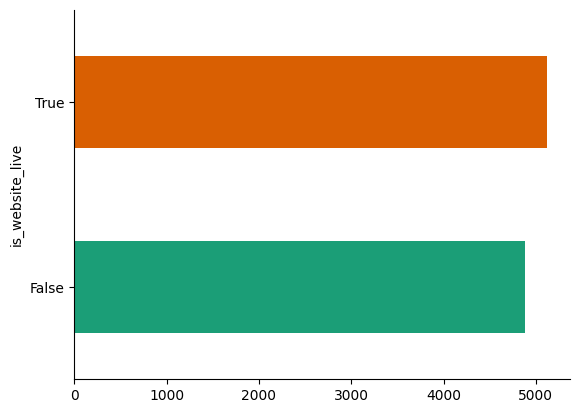

In [ ]:
# @title is_website_live

from matplotlib import pyplot as plt
import seaborn as sns
live_url_check.groupby('is_website_live').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe()

,url,label
count,6568184,6568184
unique,6551802,2
top,103.234.36.75/rd927.exe,malignant
freq,27,3480467


In [ ]:
live_url_check.describe()

,url,label,is_website_live
count,10000,10000,10000
unique,10000,2,2
top,www.experiencecanyonroad.com/countertop-att/69...,malignant,True
freq,1,5352,5117


In [ ]:
live_url_check[live_url_check['is_website_live'] == True].head()


,url,label,is_website_live
1,someyummystuff.tumblr.com,malignant,True
10,freenudebabes.blogspot.com.tr,malignant,True
13,amateursexporn.org,malignant,True
14,www.tchprint.pl/,benign,True
19,casaindonesia.com,malignant,True


In [ ]:
live_sample = live_url_check[live_url_check['is_website_live'] == True].sample(50)
live_sample.head()

,url,label,is_website_live
7175,www.moriya-s.co.jp/publics/index/30/,benign,True
2899,auoeolebx.blogspot.sg,malignant,True
4334,www.bikeworld.fi/veneet-peramoottorit/nimbus/d...,benign,True
3777,www.kooshigourmet.com/pages/faqs,benign,True
1766,jessica-simpson-picture.blogspot.ru,malignant,True


>**Key Insights:**
>- The `is_website_live` column was added to indicate whether each URL responded successfully `(status True)` or failed `(status False)`. 
>- In the sampled data, **5,117 URLs** (around 51%) were marked as `True`, meaning they were live, and **4,883** were marked as `False`.
>- The `info()` summary confirms that all columns are complete with no missing values
>- A significant portion of live URLs are marked as `malignant`, which could be due to phishing sites that are still operational, possibly targeting unsuspecting users.

##### Extracting `title` & `description` Features

In [ ]:
!pip install rapidfuzz

In [ ]:
import aiohttp
import asyncio
import pandas as pd
import logging
from bs4 import BeautifulSoup
import random
from typing import List, Tuple
from urllib.parse import urlparse
from rapidfuzz import fuzz
import time
from dataclasses import dataclass

# Configure logging to help with debugging and tracking the progress of the code
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define a dataclass to store configuration settings for the processor
@dataclass
class ProcessorConfig:
    timeout: int = 30 #Timeout for HTTP requests
    max_concurrent_requests: int = 500 #Maximum number of concurrent HTTP requests
    retries: int = 3 # Number of retries for failed requests
    wait_time: float = 1.0 # Wait time between retries
    backoff_min: float = 1.0 # Minimum backoff time for retries
    backoff_max: float = 3.0 # Maximum backoff time for retries
    chunk_size: int = 500 # Number of URLs to process in each chunk
    
# Define the main URL processor class
class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        # Initialize the URL processor with configuration settings
        self.config = config
        
    # Asynchronous function to fetch metadata (title and description) for a given URL
    async def fetch_metadata(self, url: str) -> Tuple[str, str]:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        retries = self.config.retries
        backoff_min, backoff_max = self.config.backoff_min, self.config.backoff_max
        

         # Ensure the URL starts with 'http://' or 'https://'
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url

        # Attempt to fetch the URL metadata, retrying if needed
        for attempt in range(retries):
            try:
                async with aiohttp.ClientSession() as session:
                    async with session.get(url, headers=headers, timeout=self.config.timeout) as response:
                        if response.status == 200:
                            # Parse HTML to extract title and description
                            html = await response.text()
                            soup = BeautifulSoup(html, 'html.parser')
                            title = soup.title.string.strip() if soup.title else 'No Title'
                            meta_desc = (
                                soup.find('meta', attrs={'name': 'description'}) or
                                soup.find('meta', attrs={'property': 'og:description'}) or
                                soup.find('meta', attrs={'name': 'twitter:description'})
                            )
                            description = meta_desc['content'].strip() if meta_desc else 'No Description'
                            return title, description
                        elif response.status == 429:
                            retry_after = int(response.headers.get('Retry-After', 60))
                            logging.warning(f"Rate limited for {url}. Waiting {retry_after}s")
                            # Handle rate limiting by waiting for the suggested time
                            await asyncio.sleep(retry_after)
            except Exception as e:
                # Log any errors and apply exponential backoff before retrying
                logging.error(f"Attempt {attempt + 1} failed for {url}: {e}")
                if attempt < retries - 1:
                    backoff_time = random.uniform(backoff_min, backoff_max) * (attempt + 1)
                    await asyncio.sleep(backoff_time)

        # Return default values if all attempts fail
        return 'No Title', 'No Description'

    # Asynchronous function to process metadata for all URLs in a DataFrame
    async def process_urls_metadata(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        urls = df[url_column].tolist() # Extract URLs from the specified column
        results = []
        start_time = time.time() # Record the start time for performance tracking

        # Process URLs in chunks to avoid overwhelming the system
        for i in range(0, len(urls), self.config.chunk_size):
            chunk_urls = urls[i:i + self.config.chunk_size]
            chunk_results = await self._process_chunk(chunk_urls)
            results.extend(chunk_results)

            # Log the progress of URL processing
            processed = len(results)
            elapsed = time.time() - start_time
            rate = processed / elapsed if elapsed > 0 else 0
            logging.info(f"Processed {processed}/{len(urls)} URLs at {rate:.1f} URLs/sec")

         # Combine the original DataFrame with the metadata results
        metadata_df = pd.DataFrame(results, columns=['title', 'description'])
        final_df = pd.concat([df.reset_index(drop=True), metadata_df], axis=1)

        # Calculate and log the success rate
        success_rate = sum(1 for r in results if r[0] != 'No Title') / len(results) * 100
        logging.info(f"Final Success Rate: {success_rate:.1f}%")
        logging.info(f"Total Time: {time.time() - start_time:.1f} seconds")
        return final_df

    # Helper function to process a chunk of URLs concurrently
    async def _process_chunk(self, urls: List[str]) -> List[Tuple[str, str]]:
        semaphore = asyncio.Semaphore(self.config.max_concurrent_requests)

        # Wrapper function to use semaphore for fetching metadata
        async def fetch_with_semaphore(url: str) -> Tuple[str, str]:
            async with semaphore:
                return await self.fetch_metadata(url)

          # Gather results for all URLs in the chunk concurrently
        return await asyncio.gather(*[fetch_with_semaphore(url) for url in urls])

    # Function to compute content similarity between URLs and their metadata
    def compute_content_similarity(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        title_similarity_bins = []
        description_similarity_bins = []

        for _, row in df.iterrows():
            url = row[url_column]
            title = row['title']
            description = row['description']

            # Calculate title similarity
            title_similarity_score = fuzz.token_set_ratio(url, title) if title != "No Title" else 0
            title_similarity_bins.append(self.assign_similarity_bin(title_similarity_score))

            # Calculate description similarity with separate handling for "No Description"
            if description == "No Description":
                description_similarity_bins.append("No Description")
            else:
                description_similarity_score = fuzz.token_set_ratio(url, description)
                description_similarity_bins.append(self.assign_similarity_bin(description_similarity_score))

        df['title_similarity_bin'] = title_similarity_bins
        df['description_similarity_bin'] = description_similarity_bins

        return df

    @staticmethod
    def assign_similarity_bin(score: int) -> str:
        if score >= 80:
            return "Highly Similar"
        elif score >= 50:
            return "Moderately Similar"
        elif score >= 20:
            return "Slightly Similar"
        else:
            return "Not Similar"

In [ ]:
import nest_asyncio
nest_asyncio.apply()

# Initialize the ProcessorConfig and URLProcessor
config = ProcessorConfig(timeout=10, max_concurrent_requests=1000, retries=1, chunk_size=1000)
processor = URLProcessor(config)

# Run the metadata fetching process
async def run_metadata_test():
    result_df = await processor.process_urls_metadata(live_url_check, url_column='url')
    return result_df

# Run the asynchronous metadata fetching
described_df = asyncio.run(run_metadata_test())
described_df.head()


ERROR:root:Attempt 1 failed for http://www.experiencecanyonroad.com/countertop-att/698037/how-to-get-rid-of-oil-stains-on-granite-countertops-7-remove-water-marks-stains-you-oil-stained-granite-stone-essentials-stonecare-advisor.html: Cannot connect to host www.experiencecanyonroad.com:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://cs69239801.wac.edgecastcdn.net: Cannot connect to host cs69239801.wac.edgecastcdn.net:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://www.public.navy.mil: Cannot connect to host www.public.navy.mil:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://x9.yhiroxzl.com: Cannot connect to host x9.yhiroxzl.com:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://app.5miles.us: Cannot connect to host app.5miles.us:80 ssl:default [Name or service not known]
ERROR:root:Attempt 1 failed for http://taxfilingonline.us/legal-memo-format: Cannot 

In [ ]:
described_df[19:25].head()

,url,label,is_website_live,title,description
19,casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...
20,elviaemontemayor.blogspot.com/2008/02/hate-bea...,benign,True,elvia montemayor illustrator and graphic desig...,Acrylics.
21,hamburgtwplibrary.blogspot.com/2015/07/zinio-d...,benign,True,No Title,No Description
22,chicagodentalhealth.com/hours-and-directions/,benign,True,No Title,No Description
23,ima9ines.com/en/products,benign,True,No Title,No Description


In [ ]:
config = ProcessorConfig()
processor = URLProcessor(config)


described_with_scores = processor.compute_content_similarity(described_df, url_column='url')

In [ ]:
described_df[(described_df['title'] != 'No Title') & (described_df['description'] != 'No Description')].head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin
19,casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar
20,elviaemontemayor.blogspot.com/2008/02/hate-bea...,benign,True,elvia montemayor illustrator and graphic desig...,Acrylics.,Slightly Similar,Not Similar
24,musiprofejesus.blogspot.com/2009/07/body-percu...,benign,True,BODY PERCUSSION,Una nova modalitat de percussió que ara està m...,Not Similar,Slightly Similar
55,counterfem2.blogspot.com/2016/01/feminist-triu...,benign,True,The Counter-Feminist 2: Feminist Triumphalism ...,Feminist Triumphalism and Feminist Subjectivis...,Slightly Similar,Slightly Similar
71,thejapanfoundation.blogspot.com/2010/02/this-i...,benign,True,THIS IS IT！（その1）A Worldful of Friends : The Ja...,こんにちは。マニラの三富です。 日本では、マイケル・ジャクソンのDVD「THIS IS IT...,Slightly Similar,Not Similar


In [ ]:
described_with_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
dtypes: bool(1), object(6)
memory usage: 478.6+ KB


>**Key Insights:**
>- We used asynchronous requests to extract `titles` & `descriptions` for each URL.
>- Some URLs returned the default `No Title` or `No Description`, likely indicating pages without proper metadata or blocked content.
>- `Title` and `description` similarity scores were computed between the URL and its respective metadata using token_set_ratio. We then categorised these scores into ***(Highly Similar, Slightly Similar, Not Similar)***. This then helps interpret the relevance of titles and descriptions to the URL.
>- The `info()` output confirms that all 10,000 entries for `title_similarity_bin` and `description_similarity_bin`, have no missing values.
>- `title_similarity_bin` and `description_similarity_bin` are features that can serve as strong indicators in the model, with higher similarity often suggesting a legitimate URL.


##### Extracting `creation_date`, `expiry_date`, `url_length`, `num_subdirectories`, `num_query_params`, `has_ip_address`, `is_https`,`has_www`, `num_subdomains`, `domain_length` & `tld` Features

In [ ]:
!pip install python-whois

In [ ]:
import asyncio
import pandas as pd
import logging
from whois import whois
from urllib.parse import urlparse
from dataclasses import dataclass
from typing import Optional, Tuple

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define a dataclass to store configuration settings for the processor
@dataclass
class ProcessorConfig:
    max_concurrent_requests: int = 10
    batch_size: int = 100
    wait_time: float = 1.0
    timeout: int = 10  # Timeout for WHOIS requests

class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        self.config = config

    # Asynchronous function to fetch WHOIS data for a given domain
    async def fetch_whois_data(self, domain: str) -> Tuple[Optional[str], Optional[str]]:
        """Fetches creation and expiration dates from WHOIS data with timeout handling."""
        try:
            # Use asyncio.to_thread to run the WHOIS query in a separate thread
            whois_data = await asyncio.to_thread(whois, domain)
            
            # Extract creation and expiration dates, handling cases where they may be lists
            creation_date = str(whois_data.creation_date[0]) if isinstance(whois_data.creation_date, list) else str(whois_data.creation_date)
            expiry_date = str(whois_data.expiration_date[0]) if isinstance(whois_data.expiration_date, list) else str(whois_data.expiration_date)
            return creation_date, expiry_date
        except asyncio.TimeoutError:
            logging.warning(f"Timeout fetching WHOIS data for {domain}.")
            return None, None
        except Exception as e:
            logging.warning(f"Error fetching WHOIS data for {domain}: {e}")
            return None, None

    # Asynchronous function to update a DataFrame with WHOIS data
    async def update_dataframe_with_whois(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Updates the DataFrame with WHOIS creation and expiry dates."""
        # Ensure URLs have "http://" if missing
        df[url_column] = df[url_column].apply(lambda url: f"http://{url}" if not urlparse(url).scheme else url)
        urls = df[url_column].tolist()

        creation_dates = []
        expiry_dates = []
        semaphore = asyncio.Semaphore(self.config.max_concurrent_requests)

         # Wrapper function to use semaphore for fetching WHOIS data
        async def fetch_with_semaphore(url):
            async with semaphore:
                return await self.fetch_whois_data(urlparse(url).netloc)
            

         # Process URLs in batches to avoid overwhelming the system
        for i in range(0, len(urls), self.config.batch_size):
            batch_urls = urls[i:i + self.config.batch_size]
            logging.info(f"Processing WHOIS batch {i // self.config.batch_size + 1} of {len(urls) // self.config.batch_size + 1}")

            # Fetch WHOIS data concurrently for the batch
            batch_results = await asyncio.gather(*(fetch_with_semaphore(url) for url in batch_urls), return_exceptions=True)

            # Process results, handling any None or exceptions
            for result in batch_results:
                if isinstance(result, Exception):
                    creation_dates.append(None)
                    expiry_dates.append(None)
                else:
                    creation_dates.append(result[0])
                    expiry_dates.append(result[1])

            # Wait before the next batch
            if i + self.config.batch_size < len(urls):
                logging.info(f"Waiting for {self.config.wait_time} seconds before processing the next batch...")
                await asyncio.sleep(self.config.wait_time)

        # Update the DataFrame with the fetched data
        df['creation_date'] = creation_dates
        df['expiry_date'] = expiry_dates
        return df

     # method to initiate the WHOIS data processing
    async def process_whois_data(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Public method to fetch and update WHOIS data in the DataFrame."""
        logging.info("Starting WHOIS data processing...")
        updated_df = await self.update_dataframe_with_whois(df, url_column)
        logging.info("Completed WHOIS data processing.")
        return updated_df


In [ ]:
# Initialize ProcessorConfig and URLProcessor
config = ProcessorConfig(max_concurrent_requests=1000, batch_size=1000, wait_time=10, timeout=10)
processor = URLProcessor(config)

# Run WHOIS data fetching
async def run_whois_test():
    result_df = await processor.process_whois_data(described_with_scores, url_column='url')
    return result_df

# Execute the asynchronous WHOIS processing
who_is_df = asyncio.run(run_whois_test())
who_is_df.head()


Streaming output truncated to the last 5000 lines.
reserves the right to modify these terms at any time.

The Registry database contains ONLY .COM, .NET, .EDU domains and
Registrars.

[ restricted to network administration purposes. For further information,     ]
[ use 'whois -h whois.jprs.jp help'. To suppress Japanese output, add'/e'     ]
[ at the end of command, e.g. 'whois -h whois.jprs.jp xxx/e'.                 ]
No match!!

JPRS WHOISは、JPRSが管理している以下のドメイン名に関する情報を確認でき
るサービスです。
    ・登録されているJPドメイン名
    ・JPRSを管理レジストラとするgTLD等ドメイン名
詳しくは https://jprs.jp/about/dom-search/jprs-whois/ を参照してください。

参考: IPアドレスのWHOISサーバ
   ・JPNIC WHOIS(whois.nic.ad.jp)
   ・APNIC WHOIS(whois.apnic.net)
   ・ARIN WHOIS(whois.arin.net)
   ・RIPE WHOIS(whois.ripe.net)
   ・LACNIC WHOIS(whois.lacnic.net)
   ・AfriNIC WHOIS(whois.afrinic.net)



>>> Last update of WHOIS database: 2024.11.12T22:34:06Z <<<


>>> Last update of WHOIS database: 2024.11.12T22:34:06Z <<<

>>> Last update of whois database: 2024-11-12T19:34:0

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
2,http://www.baby-markt.ch/noukie-s-boys-schlafa...,benign,False,No Title,No Description,Not Similar,No Description,None,None,75,1,0,False,0,1,2,3,ch
3,http://www.public.navy.mil,malignant,False,No Title,No Description,Not Similar,No Description,None,None,26,0,0,False,0,1,3,3,mil
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com


In [ ]:
who_is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [ ]:
who_is_df[who_is_df['creation_date']!='None'].head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com
5,http://frameworth.com/cart/bernie-geoffrion-po...,malignant,False,No Title,No Description,Not Similar,No Description,1999-08-23 18:57:52,2025-08-23 18:57:52,67,2,0,False,0,0,1,10,com
6,http://cs69239801.wac.edgecastcdn.net,malignant,False,No Title,No Description,Not Similar,No Description,2006-12-01 02:04:21,2025-12-01 02:04:21,37,0,0,False,0,0,3,10,net


In [ ]:
from urllib.parse import urlparse, parse_qs
import pandas as pd

class URLProcessor:
    def __init__(self, config):
        self.config = config

    def ensure_url_scheme(self, url: str) -> str:
        """Return a modified URL with 'http://' added if the scheme is missing, without altering the original URL."""
        parsed_url = urlparse(url)
        # Only return a modified version if scheme is missing, otherwise return the original URL
        return 'http://' + url if not parsed_url.scheme else url

    #extract url features
    def extract_url_features(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Extracts various features from URLs, adding them as new columns in the DataFrame."""
        # Create a temporary column '_with_scheme' using the modified version of URLs for feature extraction only
        df['_with_scheme'] = df[url_column].apply(self.ensure_url_scheme)

        # Parse URLs from the temporary '_with_scheme' column only
        parsed_urls = df['_with_scheme'].apply(urlparse)

        # Create feature columns based on parsed URLs from the '_with_scheme' column
        df['url_length'] = df['_with_scheme'].str.len()
        df['num_subdirectories'] = parsed_urls.apply(lambda x: len(x.path.split('/')) - 1 if x.path else 0)
        df['num_query_params'] = parsed_urls.apply(lambda x: len(parse_qs(x.query)))
        df['has_ip_address'] = parsed_urls.apply(lambda x: any(char.isdigit() for char in x.netloc.split('.')) if x.netloc else False)
        df['is_https'] = parsed_urls.apply(lambda x: 1 if x.scheme == 'https' else 0)
        df['has_www'] = parsed_urls.apply(lambda x: 1 if 'www.' in x.netloc else 0)
        df['num_subdomains'] = parsed_urls.apply(lambda x: len(x.netloc.split('.')) - 1 if x.netloc else 0)
        df['domain_length'] = parsed_urls.apply(lambda x: len(x.netloc.split('.')[0]) if x.netloc else 0)
        df['tld'] = parsed_urls.apply(lambda x: x.netloc.split('.')[-1] if '.' in x.netloc else '')

        # Drop the temporary '_with_scheme' column to keep only the original URLs and extracted features
        df.drop(columns=['_with_scheme'], inplace=True)

        return df


In [ ]:
# Initialize the processor and extract URL features
processor = URLProcessor(config)
domain_features_df = processor.extract_url_features(who_is_df, url_column='url')
domain_features_df.head()


,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld
0,http://www.experiencecanyonroad.com/countertop...,benign,False,No Title,No Description,Not Similar,No Description,None,None,201,3,0,False,0,1,2,3,com
1,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com
2,http://www.baby-markt.ch/noukie-s-boys-schlafa...,benign,False,No Title,No Description,Not Similar,No Description,None,None,75,1,0,False,0,1,2,3,ch
3,http://www.public.navy.mil,malignant,False,No Title,No Description,Not Similar,No Description,None,None,26,0,0,False,0,1,3,3,mil
4,http://x9.yhiroxzl.com,malignant,False,No Title,No Description,Not Similar,No Description,None,None,22,0,0,False,0,0,2,2,com


In [ ]:
domain_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [ ]:
domain_features_df.groupby('label')['url_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,70.365534,40.801814,16.0,47.0,62.0,83.0,771.0
malignant,5352.0,33.532698,15.655587,11.0,25.0,31.0,37.0,306.0


> **Key Insights:**
>- `creation_date` and `expiry_date` can be strong indicators, with older domains and long expiry dates often suggesting legitimacy.
>- The maximum `url_length` also differ significantly, with `benign` URLs reaching up to 771 characters versus 306 for `malignant` URLs, suggesting that legitimate URLs might contain extensive paths or query strings for various resources.
>- Phishing URLs often have many `subdomains` or unusually long/short domain names to appear similar to real sites.


##### Extracting `total_links` & `external_links` Features

In [ ]:
import nest_asyncio
import asyncio
import logging
from urllib.parse import urlparse, urlunparse
from typing import Tuple, List
from dataclasses import dataclass
import aiohttp
from bs4 import BeautifulSoup
import pandas as pd
import time

# Apply nest_asyncio to allow nested event loops
nest_asyncio.apply()

# Setup logging for monitoring the process
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define a dataclass to store configuration settings for the processor
@dataclass
class ProcessorConfig:
    batch_size: int = 300
    retries: int = 1
    wait_time: float = 1.0
    timeout: int = 20
    concurrency: int = 10

class URLProcessor:
    def __init__(self, config: ProcessorConfig):
        self.config = config
        

    """Ensure URL has both http and https versions, and corrects malformed URLs with triple slashes."""
    def _normalize_url(self, url: str) -> Tuple[str, str]:
        
        parsed_url = urlparse(url)

        # Fix the URL if it lacks a scheme by setting a default one
        if not parsed_url.scheme:
            parsed_url = parsed_url._replace(scheme="http")

        # Convert any 'https:///' to 'https://'
        http_url = urlunparse(parsed_url._replace(scheme="http")).replace("///", "//")
        https_url = urlunparse(parsed_url._replace(scheme="https")).replace("///", "//")

        return http_url, https_url

    # Fetch total and external links from a URL with retries
    async def fetch_links_metadata(self, url: str, session: aiohttp.ClientSession) -> Tuple[int, int]:
        
        http_url, https_url = self._normalize_url(url)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

        for attempt in range(self.config.retries):
            for normalized_url in (http_url, https_url):
                try:
                    async with session.get(normalized_url, headers=headers, timeout=self.config.timeout) as response:
                        if response.status == 200:
                            html = await response.text()
                            soup = BeautifulSoup(html, 'html.parser')
                            all_links = soup.find_all('a', href=True)
                            external_links = [link for link in all_links if 'http' in link['href']]
                            return len(all_links), len(external_links)
                        logging.warning(f"Failed to fetch {url}: Status {response.status}")
                except Exception as e:
                    logging.error(f"Error fetching {url} (Attempt {attempt + 1}): {e}")
                    await asyncio.sleep(self.config.wait_time)  # Backoff wait
        return 0, 0  # Return zeros if all attempts fail

    #process a chunk of URLs concurrently
    async def _process_chunk(self, urls: List[str], session: aiohttp.ClientSession) -> List[Tuple[int, int]]:
        
        semaphore = asyncio.Semaphore(self.config.concurrency)

        async def fetch_with_semaphore(url):
            async with semaphore:
                return await self.fetch_links_metadata(url, session)

        return await asyncio.gather(*[fetch_with_semaphore(url) for url in urls])

    # Process a DataFrame of URLs to fetch link metadata in batches with concurrency control
    async def process_links_metadata(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        
        start_time = time.time()
        urls = df[url_column].tolist()
        results = []

        async with aiohttp.ClientSession() as session:
            for i in range(0, len(urls), self.config.batch_size):
                batch_urls = urls[i:i + self.config.batch_size]
                batch_results = await self._process_chunk(batch_urls, session)
                results.extend(batch_results)

                # Logging progress
                processed = len(results)
                elapsed = time.time() - start_time
                rate = processed / elapsed if elapsed > 0 else 0
                logging.info(f"Processed {processed}/{len(urls)} URLs at {rate:.1f} URLs/sec")

        # Add results to DataFrame
        metadata_df = pd.DataFrame(results, columns=['total_links', 'external_links'])
        df = pd.concat([df.reset_index(drop=True), metadata_df], axis=1)
        logging.info(f"Total processing time: {time.time() - start_time:.1f} seconds")
        return df


In [ ]:
# Set up the processor configuration and processor
config = ProcessorConfig(batch_size=1000, retries=1, wait_time=1.0, timeout=10, concurrency=300)
processor = URLProcessor(config)


# Separate live and non-live URLs
live_urls_df = domain_features_df[domain_features_df['is_website_live'] == True]
non_live_urls_df = domain_features_df[domain_features_df['is_website_live'] == False]

# Process live URLs to fetch link metadata
live_urls_df = asyncio.run(processor.process_links_metadata(live_urls_df, url_column='url'))


# Assign default values for non-live URLs
non_live_urls_df['total_links'] = 0
non_live_urls_df['external_links'] = 0

# Combine the processed live and non-live DataFrames
links_df = pd.concat([live_urls_df, non_live_urls_df], ignore_index=True)
links_df.head()


Streaming output truncated to the last 5000 lines.
ERROR:root:Error fetching http://oldchicks.blogspot.com.tr (Attempt 1): 
ERROR:root:Error fetching http://diamond.jp/articles/-/72376 (Attempt 1): 
ERROR:root:Error fetching http://aftersounds.foroactivo.com/t8202p40-india-martinez-album-otras-verdades (Attempt 1): 
ERROR:root:Error fetching http://www.ledu.com/xtj/xwgg/42342.html (Attempt 1): 
ERROR:root:Error fetching http://bloghunks.blogspot.mx (Attempt 1): 
ERROR:root:Error fetching http://naked-old-men.blogspot.ug (Attempt 1): 
ERROR:root:Error fetching http://texasinsider.org/?p=55542 (Attempt 1): 
ERROR:root:Error fetching http://www.cpsnb.org/fr/loi-reglement-et-lignes-directrices-medicales/directives/commentaires/521-cabinets-fermes-aux-nouveaux-clients (Attempt 1): 
ERROR:root:Error fetching http://freenet.de (Attempt 1): 
ERROR:root:Error fetching http://map.search.ch/bern,taubenstr.4 (Attempt 1): 
ERROR:root:Error fetching http://heroesofcapitalism.blogspot.com/2009/04/ewi

In [ ]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         10000 non-null  object
 1   label                       10000 non-null  object
 2   is_website_live             10000 non-null  bool  
 3   title                       10000 non-null  object
 4   description                 10000 non-null  object
 5   title_similarity_bin        10000 non-null  object
 6   description_similarity_bin  10000 non-null  object
 7   creation_date               3515 non-null   object
 8   expiry_date                 3515 non-null   object
 9   url_length                  10000 non-null  int64 
 10  num_subdirectories          10000 non-null  int64 
 11  num_query_params            10000 non-null  int64 
 12  has_ip_address              10000 non-null  bool  
 13  is_https                    10000 non-null  int

In [ ]:
links_df.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,num_subdirectories,num_query_params,has_ip_address,is_https,has_www,num_subdomains,domain_length,tld,total_links,external_links
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,0,0,False,0,0,2,14,com,0,0
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,0,0,False,0,0,3,13,tr,0,0
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,0,0,False,0,0,1,14,org,179,179
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,1,0,False,0,1,2,3,pl,39,32
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,0,0,False,0,0,1,13,com,114,112


In [ ]:
links_df.groupby('label')['external_links'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,45.016136,235.901669,0.0,0.0,0.0,13.0,8507.0
malignant,5352.0,25.577728,132.098561,0.0,0.0,0.0,0.0,5726.0


>**Key Insights:**
>- For ***live*** URLs, the `total_links` and external_links` columns were added, representing the total number of links on the page and those that point to external sites.
>- ***Non-live*** URLs were assigned default values of 0 for both total_links and external_links
>- Some `benign` URLs have up to ***8,507*** external links, suggesting that legitimate sites often have a robust network of external links, possibly for advertisements, references, or partnerships
>- The distinct difference in external links between `benign` and `malignant` URLs is that phishing sites often keep link counts low to maintain a simple and deceptive structure, while legitimate sites generally contain more links as they offer richer content, navigation, and external references.

##### Extracting `common_phishing_words`, `path_suspicious_keywords`, `typosquatting_distance`, `contains_homograph_chars`, `url_is_random`, `title_is_random`, `shortened_url`, `has_redirect`, `has_brand_name_in_domain`, `has_social_net` Features

In [ ]:
!pip install Levenshtein

In [ ]:
import pandas as pd
from urllib.parse import urlparse, parse_qs
from Levenshtein import distance as levenshtein_distance
from collections import Counter
import re
import math
from nltk.corpus import words
import nltk

# Download NLTK words once
nltk.download('words')
english_words = set(words.words())

class URLProcessor:
    phishing_keywords = ['bank', 'secure', 'account', 'login', 'label', 'invoice',
                         'post', 'document', 'postal', 'calculations', 'copy',
                         'fedex', 'statement', 'financial', 'dhl', 'usps',
                         'notification', 'irs', 'ups', 'delivery', 'ticket',
                         'urgent', 'important', 'update', 'verify']

    shorteners = ['bit.ly', 'goo.gl', 'tinyurl.com', 't.co', 'is.gd']

    known_brands = [
        "att", "paypal", "microsoft", "dhl", "meta", "irs", "verizon",
        "mufg", "adobe", "amazon", "apple", "wellsfargo",
        "ebay", "swisspost", "naver", "instagram", "whatsapp", "rakuten",
        "jreast", "americanexpress", "kddi", "office",
        "chase", "aeon", "optus", "coinbase",
        "bradesco", "caixa", "jcb", "ing",
        "hsbc", "netflix", "smbc", "nubank",
        "npa", "allegro", "inpost", "correos",
        "fedex", "linked", "usps", "google",
        "bankofamerica", "dpd", "itau",
        "steam", "swisscom", "orange"
    ]

    social_networks = ["facebook", "twitter", "instagram", "linkedin", "youtube", "tiktok", "snapchat", "pinterest", "whatsapp"]

    latin_chars = "abcdefghijklmnopqrstuvwxyz"
    cyrillic_chars = "абцдефгхийклмнопрстууввшз"
    homograph_chars = re.compile(f"[{cyrillic_chars}]", re.IGNORECASE)

    def __init__(self):
        pass
    from urllib.parse import urlparse, urlunparse

    def _normalize_url(self, url: str) -> Tuple[str, str]:
        """Ensure URL has both http and https versions, and add default scheme if missing."""
        parsed_url = urlparse(url)

        # If no scheme, assume http as default
        if not parsed_url.scheme:
            parsed_url = parsed_url._replace(scheme="http")

        # Ensure double slashes after scheme
        http_url = urlunparse(parsed_url._replace(scheme="http")).replace("///", "//")
        https_url = urlunparse(parsed_url._replace(scheme="https")).replace("///", "//")

        return http_url, https_url


    @staticmethod
    def calculate_entropy(s: str) -> float:
        """Calculate entropy to detect randomness in a string."""
        frequency = Counter(s)
        length = len(s)
        return -sum((freq / length) * math.log2(freq / length) for freq in frequency.values())

    def is_random_string(self, s: str) -> bool:
        """Detect if a string appears random based on entropy and other checks."""
        if self.calculate_entropy(s) > 4.5:
            return True

        words_in_s = re.findall(r'\b\w+\b', s)
        non_dictionary_count = sum(1 for word in words_in_s if word.lower() not in english_words)
        if non_dictionary_count > len(words_in_s) * 0.5:
            return True

        if any(len(word) > 10 for word in words_in_s):
            return True

        if re.search(r'[A-Fa-f0-9]{16,}', s) or re.search(r'[A-Za-z0-9+/]{16,}', s):
            return True

        return False

    def extract_url_features(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """Extracts various URL, domain, and query-based features for phishing detection."""
        df = df.copy()

        # Parse URL and calculate features
        df['parsed_url'] = df[url_column].apply(urlparse)
        df['path_length'] = df['parsed_url'].apply(lambda x: len(x.path))
        df['query_params'] = df['parsed_url'].apply(lambda x: parse_qs(x.query))
        df['num_query_params'] = df['query_params'].apply(len)
        df['num_slashes'] = df['parsed_url'].apply(lambda x: x.path.count('/'))
        df['has_ip_address'] = df['parsed_url'].apply(lambda x: bool(re.search(r"\b\d{1,3}(\.\d{1,3}){3}\b", x.netloc)))
        df['shortened_url'] = df['parsed_url'].apply(lambda x: any(shortener in x.netloc for shortener in self.shorteners))

        # Domain-level features
        df['domain'] = df['parsed_url'].apply(lambda x: x.netloc.split('.')[-2] if len(x.netloc.split('.')) > 1 else x.netloc)
        df['domain_length'] = df['domain'].apply(len)
        df['domain_entropy'] = df['domain'].apply(self.calculate_entropy)
        df['has_hyphen'] = df['domain'].apply(lambda x: '-' in x)
        df['char_repetition'] = df['domain'].apply(lambda x: sum(1 for char, count in Counter(x).items() if count > 1))
        df['common_phishing_words'] = df['domain'].apply(lambda x: sum(word in x for word in self.phishing_keywords))
        df['typosquatting_distance'] = df['domain'].apply(lambda domain: min((levenshtein_distance(domain, brand) for brand in self.known_brands), default=0))
        df['contains_homograph_chars'] = df['domain'].apply(lambda x: bool(self.homograph_chars.search(x)))

        # New columns for brand and social network presence in the domain
        df['has_brand_name_in_domain'] = df['domain'].apply(lambda x: any(brand in x for brand in self.known_brands))
        df['has_social_net'] = df['domain'].apply(lambda x: any(network in x for network in self.social_networks))

        # Path and query-based features
        df['path_suspicious_keywords'] = df['parsed_url'].apply(lambda x: sum(word in x.path for word in self.phishing_keywords))
        df['query_suspicious_keywords'] = df['query_params'].apply(lambda params: sum(word in key for key in params for word in self.phishing_keywords))
        df['has_redirect'] = df['parsed_url'].apply(lambda x: 'redirect' in x.path.lower() or 'redirect' in x.query.lower())

        # New features for randomness in URL, title, and description
        df['url_is_random'] = df[url_column].apply(self.is_random_string)
        if 'title' in df.columns:
            df['title_is_random'] = df['title'].apply(self.is_random_string)
        if 'description' in df.columns:
            df['description_is_random'] = df['description'].apply(self.is_random_string)

        # Clean up unnecessary columns
        df.drop(columns=['parsed_url', 'query_params', 'domain'], inplace=True)

        return df


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
processor = URLProcessor()

df_with_features = processor.extract_url_features(links_df, url_column='url')
df_with_features.head()


,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,...,typosquatting_distance,contains_homograph_chars,has_brand_name_in_domain,has_social_net,path_suspicious_keywords,query_suspicious_keywords,has_redirect,url_is_random,title_is_random,description_is_random
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,...,4,False,False,False,0,0,False,True,False,True
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,...,3,False,False,False,0,0,False,True,False,True
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,...,9,False,False,False,0,0,False,True,False,True
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,...,6,False,False,False,0,0,False,True,False,True
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,...,9,False,False,False,0,0,False,True,True,True


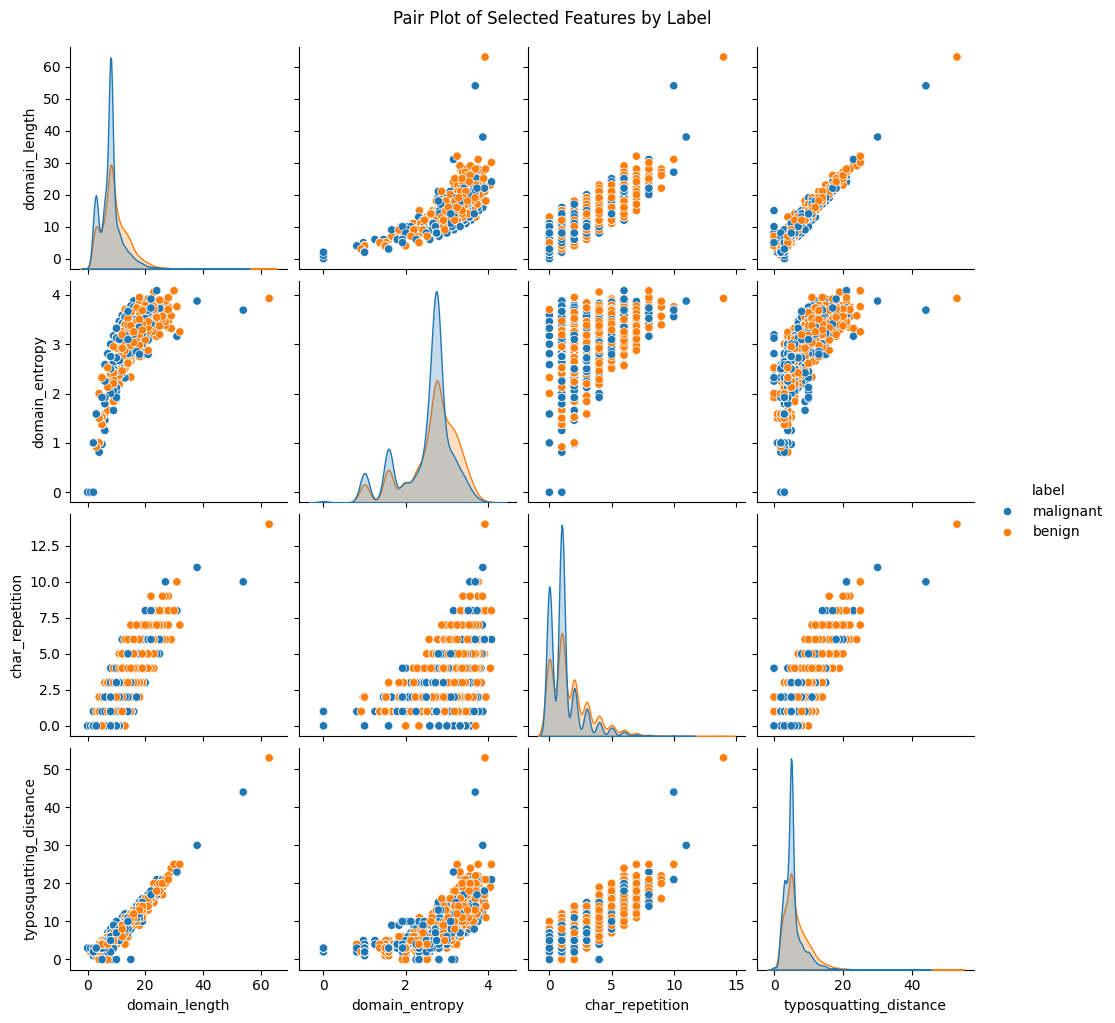

In [ ]:
sns.pairplot(df_with_features, vars=["domain_length", "domain_entropy", "char_repetition", "typosquatting_distance"], hue="label")
plt.suptitle("Pair Plot of Selected Features by Label", y=1.02)
plt.show()


>**Pair Plot Summary**


1. **Domain Length vs. Other Features**:
   - Malignant URLs tend to have longer domain lengths compared to benign URLs, as seen in the `domain_length` distribution.
   - The feature `domain_length` shows a positive correlation with `domain_entropy` and `typosquatting_distance` for both labels, indicating that longer domains tend to have higher complexity and a greater distance in typosquatting variations.

2. **Domain Entropy**:
   - `domain_entropy` tends to be higher for malignant URLs, suggesting that malicious domains have more randomness or complexity compared to benign domains.
   - The distinct separation in `domain_entropy` distributions between malignant and benign URLs indicates that this feature can help differentiate between the two classes.

3. **Character Repetition**:
   - The `char_repetition` feature shows a higher range for malignant URLs, which could indicate that repeated characters are being used to mimic legitimate domains or create confusion.

4. **Typosquatting Distance**:
   - The `typosquatting_distance` feature is positively correlated with `domain_length` and `domain_entropy`, and malignant URLs tend to show greater values in this feature.
   - This suggests that malicious URLs may employ typosquatting techniques to trick users into visiting these sites.

5. **Overall Feature Relationships**:
   - There are clear patterns that distinguish malignant URLs from benign URLs across several features.
   - Features such as `domain_length`, `domain_entropy`, `char_repetition`, and `typosquatting_distance` are likely key differentiators that could be useful in URL classification.

These observations suggest that these selected features are informative for identifying potentially malicious URLs and can play an important role in distinguishing between malignant and benign classes.


In [ ]:
df_with_features.groupby('label')['domain_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,9.356282,4.759099,0.0,6.0,8.0,12.0,63.0
malignant,5352.0,7.873318,3.868037,0.0,6.0,8.0,9.0,54.0


In [ ]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         10000 non-null  object 
 1   label                       10000 non-null  object 
 2   is_website_live             10000 non-null  bool   
 3   title                       10000 non-null  object 
 4   description                 10000 non-null  object 
 5   title_similarity_bin        10000 non-null  object 
 6   description_similarity_bin  10000 non-null  object 
 7   creation_date               3515 non-null   object 
 8   expiry_date                 3515 non-null   object 
 9   url_length                  10000 non-null  int64  
 10  num_subdirectories          10000 non-null  int64  
 11  num_query_params            10000 non-null  int64  
 12  has_ip_address              10000 non-null  bool   
 13  is_https                    1000

>**Key Insights:**
>- Phishing URLs frequently use shorter, obfuscated domains with repeated or homograph (similar-looking) characters, which make them harder to distinguish visually from legitimate URLs.
>- `Benign` URLs tend to have slightly longer domain lengths and a lower degree of entropy.
>- `Malignant` URLs: Show shorter domain lengths, higher entropy (indicating randomness), and more character repetition, aligning with typical phishing strategies.
>- The higher maximum length in `benign` URLs is ***(63)*** versus `malignant` URLs is ***(54)***. This indicates a trend where legitimate sites tend to have longer domain names, possibly due to subdomains and descriptive elements.

##### Extracting `is_https` Feature

In [ ]:
df_with_features['is_https'] = df_with_features['url'].apply(lambda url: 1 if str(url).startswith('http') else 0)
df_with_features['is_https'].head()

,is_https
0,1
1,1
2,1
3,1
4,1


In [ ]:
https_counts = df_with_features['is_https'].value_counts()

https_counts


,count
is_https,
1,9994
0,6


In [ ]:
df_with_features.columns

Index(['url', 'label', 'is_website_live', 'title', 'description',
       'title_similarity_bin', 'description_similarity_bin', 'creation_date',
       'expiry_date', 'url_length', 'num_subdirectories', 'num_query_params',
       'has_ip_address', 'is_https', 'has_www', 'num_subdomains',
       'domain_length', 'tld', 'total_links', 'external_links', 'path_length',
       'num_slashes', 'shortened_url', 'domain_entropy', 'has_hyphen',
       'char_repetition', 'common_phishing_words', 'typosquatting_distance',
       'contains_homograph_chars', 'has_brand_name_in_domain',
       'has_social_net', 'path_suspicious_keywords',
       'query_suspicious_keywords', 'has_redirect', 'url_is_random',
       'title_is_random', 'description_is_random'],
      dtype='object')

>**Key Insights:**
>- Out of the 10,000 URLs, 9,994 (or 99.94%) use HTTPS.
>- This feature alone may not be a strong indicator of legitimacy in the dataset, given that nearly all URLs, including phishing URLs, use HTTPS.

##### Extracting `path_suspicious_keywords`, `query_suspicious_keywords`, `url_similarity_score` Features

In [ ]:
df_with_features.groupby('label')['path_suspicious_keywords'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,0.036790,0.191665,0.0,0.0,0.0,0.0,2.0
malignant,5352.0,0.005232,0.081856,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_with_features['path_suspicious_keywords'] = df_with_features['path_suspicious_keywords'].astype(int)

In [ ]:
df_with_features['query_suspicious_keywords'] = df_with_features['query_suspicious_keywords'].astype(int)

In [ ]:
malign_test_df.head()

,url,label
0,brielletlrapq.blogspot.mx,malignant
1,imgshost.pro,malignant
2,ipw.metadsp.co.uk,malignant
3,amvoyeur.blogspot.lt,malignant
4,edgecommunications.com,malignant


In [ ]:
reference_urls = malign_test_df.sample(1000, random_state=123)['url'].tolist()

In [ ]:
!pip install rapidfuzz

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from rapidfuzz import fuzz
from scipy.spatial.distance import cosine
from typing import List

def compute_url_similarity_batch(df: pd.DataFrame, url_column: str, ref_urls: List[str], batch_size: int = 1000, top_n: int = 5) -> pd.DataFrame:
    # Initialize vectorizer and fit on reference URLs
    vectorizer = TfidfVectorizer(ngram_range=(4, 16), analyzer="char_wb")
    ref_vectors = vectorizer.fit_transform(ref_urls)

    # Cluster the reference URL vectors to get center vectors for comparison
    n_clusters = min(50, len(ref_urls))  # Adjust to a maximum of 50 clusters or fewer if fewer reference URLs
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ref_vectors)
    cluster_centers = kmeans.cluster_centers_

    similarity_scores = []

    # Process the main DataFrame in batches
    for start in range(0, len(df), batch_size):
        end = min(start + batch_size, len(df))
        print(f"Processing batch {start // batch_size + 1} ({start} to {end})")

        # Transform URLs in the current batch
        batch_urls = df[url_column][start:end]
        url_vectors = vectorizer.transform(batch_urls)

        # Calculate similarity scores for each URL vector in the batch
        for url_vec in url_vectors:
            url_vec_1d = url_vec.toarray().flatten()  # Convert to 1D array
            scores = [1 - cosine(url_vec_1d, center.flatten()) for center in cluster_centers]  # Ensure 1D arrays
            top_scores = sorted(scores, reverse=True)[:top_n]
            avg_top_score = np.mean(top_scores)
            similarity_scores.append(avg_top_score)

    # Append similarity scores to the DataFrame
    df['url_similarity_score'] = similarity_scores

    # Define thresholds for bins
    bins = [0, 0.25, 0.5, 0.75, 1.0]
    labels = ["Unlikely", "Less Likely", "Likely", "Very Likely"]
    df['similarity_bin'] = pd.cut(df['url_similarity_score'], bins=bins, labels=labels, include_lowest=True)



    return df




In [ ]:
df_with_similarity = compute_url_similarity_batch(df_with_features, url_column='url', ref_urls=reference_urls, batch_size=400, top_n=2)

Processing batch 1 (0 to 400)
Processing batch 2 (400 to 800)
Processing batch 3 (800 to 1200)
Processing batch 4 (1200 to 1600)


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


Processing batch 5 (1600 to 2000)
Processing batch 6 (2000 to 2400)
Processing batch 7 (2400 to 2800)
Processing batch 8 (2800 to 3200)
Processing batch 9 (3200 to 3600)
Processing batch 10 (3600 to 4000)
Processing batch 11 (4000 to 4400)
Processing batch 12 (4400 to 4800)
Processing batch 13 (4800 to 5200)
Processing batch 14 (5200 to 5600)
Processing batch 15 (5600 to 6000)
Processing batch 16 (6000 to 6400)
Processing batch 17 (6400 to 6800)
Processing batch 18 (6800 to 7200)
Processing batch 19 (7200 to 7600)
Processing batch 20 (7600 to 8000)
Processing batch 21 (8000 to 8400)
Processing batch 22 (8400 to 8800)
Processing batch 23 (8800 to 9200)
Processing batch 24 (9200 to 9600)
Processing batch 25 (9600 to 10000)


In [ ]:
df_with_similarity.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,creation_date,expiry_date,url_length,...,has_brand_name_in_domain,has_social_net,path_suspicious_keywords,query_suspicious_keywords,has_redirect,url_is_random,title_is_random,description_is_random,url_similarity_score,similarity_bin
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,2006-06-08 22:11:40,2025-06-08 22:11:40,32,...,False,False,0,0,False,True,False,True,0.279899,Less Likely
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,None,None,36,...,False,False,0,0,False,True,False,True,0.284072,Less Likely
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,2008-08-05 01:03:06,2025-08-05 01:03:06,25,...,False,False,0,0,False,True,False,True,0.058116,Unlikely
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,None,None,23,...,False,False,0,0,False,True,False,True,0.020486,Unlikely
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,None,None,24,...,False,False,0,0,False,True,True,True,0.095083,Unlikely


In [ ]:
df_with_similarity.groupby('label')['url_similarity_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.058665,0.041288,0.001326,0.030481,0.048076,0.072439,0.373369
malignant,5343.0,0.158740,0.107956,0.003979,0.069055,0.136166,0.236034,0.520087


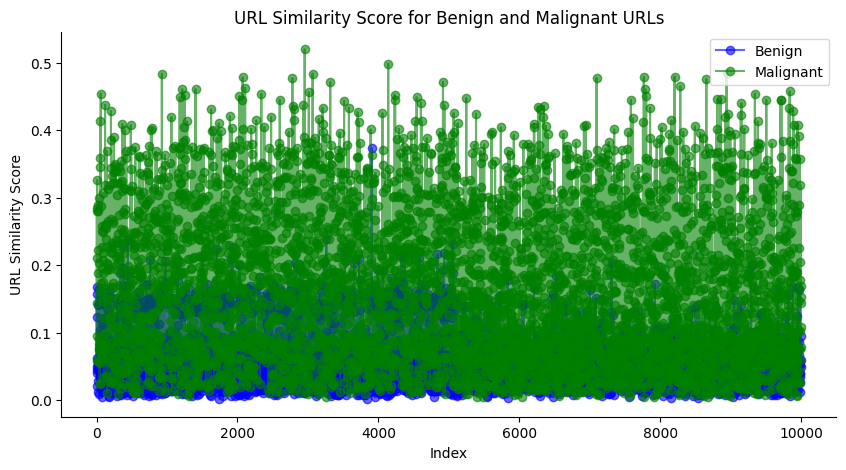

In [ ]:
from matplotlib import pyplot as plt

# Separate the DataFrame into benign and malignant subsets
benign_urls_similar = df_with_similarity[df_with_similarity['label'] == 'benign']
malignant_urls_similar = df_with_similarity[df_with_similarity['label'] == 'malignant']

# Plot URL similarity scores for benign URLs
plt.figure(figsize=(10, 5))
plt.plot(benign_urls_similar.index, benign_urls_similar['url_similarity_score'], color='blue', label='Benign', linestyle='-', marker='o', alpha = 0.6)

# Plot URL similarity scores for malignant URLs
plt.plot(malignant_urls_similar.index, malignant_urls_similar['url_similarity_score'], color='green', label='Malignant', linestyle='-', marker='o',alpha=0.6)

# Customize the plot
plt.title('URL Similarity Score for Benign and Malignant URLs')
plt.xlabel('Index')
plt.ylabel('URL Similarity Score')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()


**URL Similarity Score Analysis**

1. **URL Similarity Score**:
   - The `URL Similarity Score` represents the degree of similarity between a URL and known phishing URLs. The similarity score is computed by comparing the structure of the URL to a set of known phishing URLs using KMeans clustering, which groups similar URLs and acts similarly to a k-nearest neighbors (KNN) approach.
   - Higher similarity scores indicate that a given URL has structural similarities to known phishing URLs, which could be a sign of malicious intent.

2. **Distribution for Malignant vs. Benign**:
   - Malignant URLs (in green) generally have a wider range of similarity scores, often showing higher similarity values compared to benign URLs.
   - Benign URLs (in blue) tend to have lower similarity scores, suggesting that they are less likely to resemble known phishing URLs.

3. **Implications for URL Classification**:
   - The separation in similarity scores between benign and malignant URLs can be highly informative for classification. Malicious URLs will likely have similarities to other known phishing URLs, and these similarity scores can serve as an important feature in distinguishing between benign and malicious URLs.
   - Incorporating this feature into our model can significantly enhance its ability to detect phishing or deceptive websites by leveraging the structural resemblance of URLs to known threats.



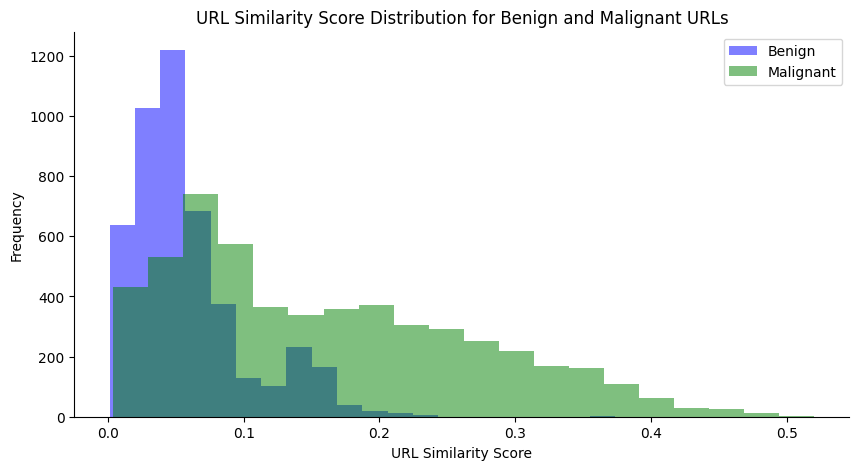

In [ ]:


# Plot histogram for benign URLs
plt.figure(figsize=(10, 5))
plt.hist(benign_urls_similar['url_similarity_score'], bins=20, color='blue', alpha=0.5, label='Benign')

# Plot histogram for malignant URLs
plt.hist(malignant_urls_similar['url_similarity_score'], bins=20, color='green', alpha=0.5, label='Malignant')

# Customize the plot
plt.title('URL Similarity Score Distribution for Benign and Malignant URLs')
plt.xlabel('URL Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()


>**Key Insights:**
>- Both `benign` and `malignant` URLs exhibit a very low average count of suspicious keywords within the URL path. This indicates that explicit phishing keywords within the path or query are rare, as phishing sites often obfuscate their intent by avoiding these terms.
>- Most `benign` URLs have similarity scores between 0.0 and 0.1, with very few extending beyond 0.15. This supports the idea that benign URLs tend not to resemble the structural patterns of known phishing URLs.
>- `URL Similarity Score` feature proves valuable for distinguishing phishing URLs from benign URLs, as phishing URLs tend to cluster around certain structural patterns that benign URLs lack.

##### Extracting `domain_title_match_score` Feature

In [ ]:
import re
from difflib import SequenceMatcher
import pandas as pd
from urllib.parse import urlparse

class URLProcessor:
    # Existing methods from your class...

    def calculate_domain_title_match_score(self, df: pd.DataFrame, url_column: str, title_column: str) -> pd.DataFrame:
        """
        Calculate a match score between the domain and title for each row in a DataFrame.
        Adds a new column 'domain_title_match_score' with the match score.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs and titles.
        - url_column (str): Column name in the DataFrame with the URLs.
        - title_column (str): Column name in the DataFrame with the titles.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'domain_title_match_score' column.
        """
        def calculate_score(url, title):
            try:
                # Extract the domain from the URL
                domain = urlparse(url).netloc.lower()

                # Convert title to lowercase for consistency
                title = title.lower()

                # Remove non-alphanumeric characters from domain and title for simpler matching
                domain_words = re.findall(r'\b\w+\b', domain)
                title_words = re.findall(r'\b\w+\b', title)

                # Calculate word overlap ratio
                common_words = set(domain_words) & set(title_words)
                word_overlap_score = len(common_words) / max(len(domain_words), len(title_words), 1)

                # Calculate string similarity using SequenceMatcher
                string_similarity_score = SequenceMatcher(None, domain, title).ratio()

                # Combine both scores into an overall match score
                match_score = 0.5 * word_overlap_score + 0.5 * string_similarity_score

                return match_score
            except Exception as e:
                print(f"Error calculating domain-title match score for URL '{url}' and title '{title}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["domain_title_match_score"] = df.apply(
            lambda row: calculate_score(row[url_column], row[title_column]), axis=1
        )

        return df




In [ ]:

processor = URLProcessor()
df_with_scores = processor.calculate_domain_title_match_score(df_with_similarity, url_column="url", title_column="title")
df_with_scores[['url', 'title', 'domain_title_match_score']].head()

,url,title,domain_title_match_score
0,http://someyummystuff.tumblr.com,No Title,0.060606
1,http://freenudebabes.blogspot.com.tr,No Title,0.027027
2,http://amateursexporn.org,No Title,0.076923
3,http://www.tchprint.pl/,No Title,0.173913
4,http://casaindonesia.com,Daily Life - Home Ideas - Travel & Destination...,0.056338


In [ ]:
df_with_scores.groupby('label')['domain_title_match_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4648.0,0.093768,0.072559,0.0,0.052632,0.083333,0.111111,1.0
malignant,5352.0,0.082108,0.057375,0.0,0.050000,0.075000,0.102564,1.0


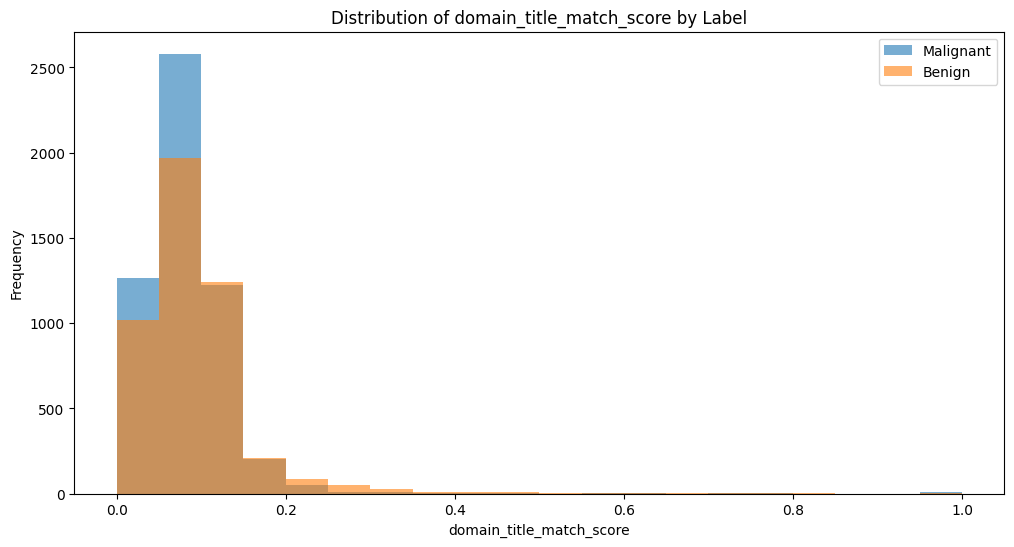

In [ ]:
# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_features[df_with_features['label'] == 'malignant']['domain_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_features[df_with_features['label'] == 'benign']['domain_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('domain_title_match_score')
plt.ylabel('Frequency')
plt.title('Distribution of domain_title_match_score by Label')
plt.legend()
plt.show()


>**Key Insights:**
>- The `domain_title_match_score` could be a useful feature for phishing detection, as phishing sites tend to have slightly lower match scores, indicating weaker alignment between the `domain` and `title`.

##### Extract `url_title_match_score` Feature

In [ ]:

from difflib import SequenceMatcher


class URLProcessor:
    # Existing methods from your class...

    def calculate_url_title_match_score(self, df: pd.DataFrame, url_column: str, title_column: str) -> pd.DataFrame:
        """
        Calculate a match score between the full URL and the title for each row in a DataFrame.
        Adds a new column 'url_title_match_score' with the match score.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs and titles.
        - url_column (str): Column name in the DataFrame with the URLs.
        - title_column (str): Column name in the DataFrame with the titles.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'url_title_match_score' column.
        """
        def calculate_score(url, title):
            try:
                # Convert URL and title to lowercase for consistency
                url = url.lower()
                title = title.lower()

                # Remove non-alphanumeric characters for simpler matching
                url_words = re.findall(r'\b\w+\b', url)
                title_words = re.findall(r'\b\w+\b', title)

                # Calculate word overlap ratio
                common_words = set(url_words) & set(title_words)
                word_overlap_score = len(common_words) / max(len(url_words), len(title_words), 1)

                # Calculate string similarity using SequenceMatcher
                string_similarity_score = SequenceMatcher(None, url, title).ratio()

                # Combine both scores into an overall match score
                match_score = 0.5 * word_overlap_score + 0.5 * string_similarity_score

                return match_score
            except Exception as e:
                print(f"Error calculating URL-title match score for URL '{url}' and title '{title}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["url_title_match_score"] = df.apply(
            lambda row: calculate_score(row[url_column], row[title_column]), axis=1
        )

        return df



In [ ]:
processor = URLProcessor()

df_with_scores = processor.calculate_url_title_match_score(df_with_scores, url_column="url", title_column="title")
df_with_scores[['url', 'title', 'url_title_match_score']].head()


,url,title,url_title_match_score
0,http://someyummystuff.tumblr.com,No Title,0.075000
1,http://freenudebabes.blogspot.com.tr,No Title,0.068182
2,http://amateursexporn.org,No Title,0.090909
3,http://www.tchprint.pl/,No Title,0.096774
4,http://casaindonesia.com,Daily Life - Home Ideas - Travel & Destination...,0.089744


In [ ]:
df_with_scores.groupby('label')['url_title_match_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.074444,0.082218,0.0,0.042254,0.054545,0.071429,0.660714
malignant,5343.0,0.088281,0.042019,0.0,0.071429,0.083333,0.100000,0.844444


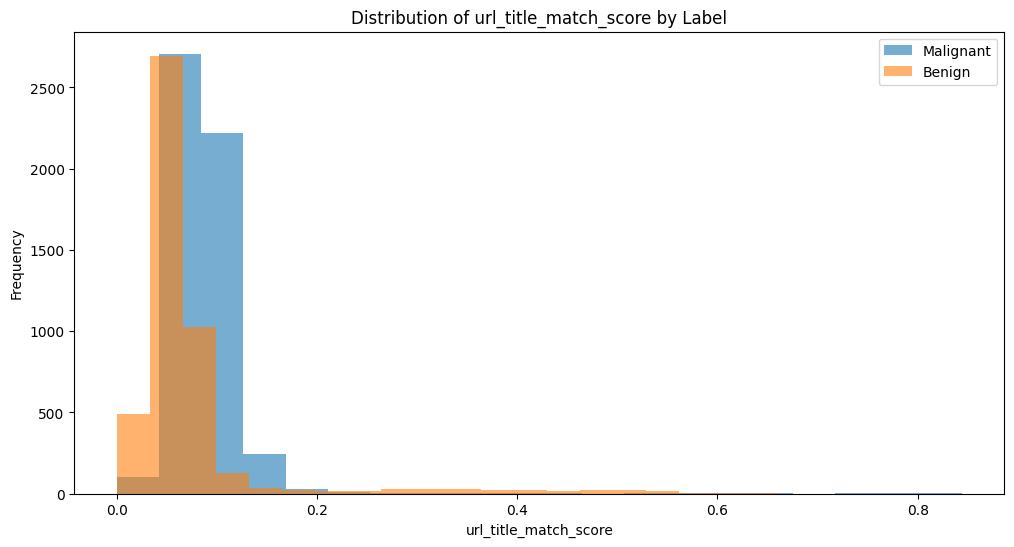

In [ ]:
# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_scores[df_with_features['label'] == 'malignant']['url_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_scores[df_with_features['label'] == 'benign']['url_title_match_score'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('url_title_match_score')
plt.ylabel('Frequency')
plt.title('Distribution of url_title_match_score by Label')
plt.legend()
plt.show()


>**Key Insights:**
>- Most of `benign` URLs have low match scores, primarily between 0.0 and 0.1, with very few exceeding 0.2. This suggests that even legitimate sites generally have minimal similarity between their URLs and titles, possibly due to descriptive or branded URLs that do not directly match the title

##### Extracting `digit_ratio_in url` Feature

In [ ]:
class URLProcessor:
    # Existing methods from your class...

    def calculate_digit_ratio_in_url(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """
        Calculate the ratio of digits to the total number of characters in a URL for each row in a DataFrame.
        Adds a new column 'digit_ratio_in_url' with the digit ratio.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs.
        - url_column (str): Column name in the DataFrame with the URLs.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'digit_ratio_in_url' column.
        """
        def calculate_ratio(url):
            try:
                # Remove non-alphanumeric characters from the URL for consistency
                alphanumeric_url = re.sub(r'\W', '', url)

                # Count digits and calculate the ratio
                digit_count = sum(char.isdigit() for char in alphanumeric_url)
                total_length = len(alphanumeric_url)

                # Avoid division by zero
                if total_length == 0:
                    return 0.0

                # Calculate and return the digit ratio
                return digit_count / total_length
            except Exception as e:
                print(f"Error calculating digit ratio for URL '{url}': {e}")
                return 0.0

        # Apply the calculation to each row in the DataFrame
        df["digit_ratio_in_url"] = df[url_column].apply(calculate_ratio)

        return df



In [ ]:
processor = URLProcessor()

df_with_digit_ratio = processor.calculate_digit_ratio_in_url(df_with_scores, url_column="url")
df_with_digit_ratio[['url', 'digit_ratio_in_url']].head()


,url,digit_ratio_in_url
0,http://someyummystuff.tumblr.com,0.0
1,http://freenudebabes.blogspot.com.tr,0.0
2,http://amateursexporn.org,0.0
3,http://www.tchprint.pl/,0.0
4,http://casaindonesia.com,0.0


In [ ]:
df_with_digit_ratio.groupby('label')['digit_ratio_in_url'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
benign,4645.0,0.110848,0.109052,0.0,0.0,0.094118,0.162393,0.672727
malignant,5343.0,0.034913,0.079421,0.0,0.0,0.000000,0.032258,1.000000


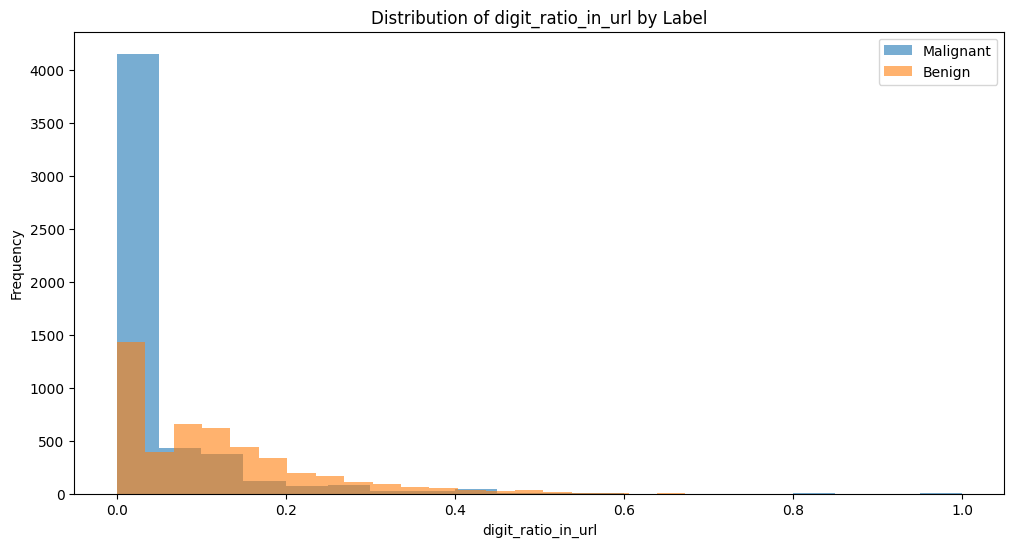

In [ ]:
# Plot histogram for each label category
plt.figure(figsize=(12, 6))
df_with_digit_ratio[df_with_digit_ratio['label'] == 'malignant']['digit_ratio_in_url'].plot(kind='hist', bins=20, alpha=0.6, label='Malignant')
df_with_digit_ratio[df_with_digit_ratio['label'] == 'benign']['digit_ratio_in_url'].plot(kind='hist', bins=20, alpha=0.6, label='Benign')
plt.xlabel('digit_ratio_in_url')
plt.ylabel('Frequency')
plt.title('Distribution of digit_ratio_in_url by Label')
plt.legend()
plt.show()


>**Key Insights:**
>- `Benign` URLs often contain more digits, possibly due to identifiers or parameters in legitimate website URLs.
>- `Malignant` URLs are heavily concentrated around a digit ratio close to 0. This concentration around zero indicates that phishing URLs generally avoid digits, likely to maintain simplicity and improve believability.
>- The `digit_ratio_in_url` provides a strong differentiator, as phishing URLs typically have low digit ratios. This feature could be a valuable indicator in phishing detection, particularly since legitimate URLs tend to include digits as part of query strings or identifiers.

##### Extracting `domain_age`, `days_to_expiry`, `is_expired`, `registration_duration`, `registration_type`, `expiration_risk` Features

In [ ]:
import pandas as pd
from datetime import datetime

class URLProcessor:
    def compute_domain_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Adds domain-related features to the DataFrame based on existing creation and expiry dates."""

        # Convert 'creation_date' and 'expiry_date' to datetime format, handling errors
        df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
        df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')

        # Current date for calculations
        current_date = datetime.now()

        # Calculate domain age in years from the creation_date
        df['domain_age'] = df['creation_date'].apply(
            lambda x: (current_date - x).days // 365 if pd.notnull(x) else 0
        )

        # Calculate days to expiry from the expiry_date
        df['days_to_expiry'] = df['expiry_date'].apply(
            lambda x: (x - current_date).days if pd.notnull(x) else 0
        )

        # Flag expired domains
        df['is_expired'] = df['expiry_date'].apply(
            lambda x: x < current_date if pd.notnull(x) else False
        )

        # Calculate registration duration in years (from creation_date to expiry_date)
        df['registration_duration'] = df.apply(
            lambda row: (row['expiry_date'] - row['creation_date']).days // 365
            if pd.notnull(row['expiry_date']) and pd.notnull(row['creation_date']) else 0, axis=1
        )

        # Classify as "short-term" if registration duration is less than 2 years, otherwise "long-term"
        df['registration_type'] = df['registration_duration'].apply(
            lambda x: 'short-term' if x and x < 2 else 'long-term' if x else 'unknown'
        )

        # Define expiration risk as "high" if expired or expiring within 30 days
        df['expiration_risk'] = df['days_to_expiry'].apply(
            lambda x: 'high' if x <= 30 and x > 0 else 'low' if x > 30 else 'unknown'
        )

        # Fill missing values with appropriate fillers
        df['domain_age'].fillna(0, inplace=True)
        df['days_to_expiry'].fillna(0, inplace=True)
        df['registration_duration'].fillna(0, inplace=True)
        df['registration_type'].fillna('unknown', inplace=True)
        df['expiration_risk'].fillna('unknown', inplace=True)

        return df


In [ ]:

# Initialize URLProcessor and compute domain features
url_processor = URLProcessor()
df_with_domain_age = url_processor.compute_domain_features(df_with_digit_ratio)

# Display the resulting DataFrame
df_with_domain_age[['url', 'creation_date', 'expiry_date', 'domain_age', 'days_to_expiry', 'is_expired', 'registration_duration', 'registration_type', 'expiration_risk']].head()

<ipython-input-469-dc80c3206ae9>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain_age'].fillna(0, inplace=True)
<ipython-input-469-dc80c3206ae9>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,url,creation_date,expiry_date,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
0,http://someyummystuff.tumblr.com,2006-06-08 22:11:40,2025-06-08 22:11:40,18,208,False,19,long-term,low
1,http://freenudebabes.blogspot.com.tr,NaT,NaT,0,0,False,0,unknown,unknown
2,http://amateursexporn.org,NaT,NaT,0,0,False,0,unknown,unknown
3,http://www.tchprint.pl/,NaT,NaT,0,0,False,0,unknown,unknown
4,http://casaindonesia.com,NaT,NaT,0,0,False,0,unknown,unknown


In [ ]:
# Extract the domain from the URL if it was removed earlier
df_with_domain_age['domain'] = df_with_domain_age['url'].apply(lambda x: urlparse(x).netloc.split('.')[-1] if len(urlparse(x).netloc.split('.')) > 1 else urlparse(x).netloc)

In [ ]:
from urllib.parse import urlparse

class URLProcessor:
   

    #extract domain as a separate column
    def extract_domain(self, df: pd.DataFrame, url_column: str) -> pd.DataFrame:
        """
        Extracts the main domain from URLs and adds it as a new column 'domain' in the DataFrame.

        Args:
        - df (pd.DataFrame): DataFrame containing the URLs.
        - url_column (str): Column name in the DataFrame with the URLs.

        Returns:
        - pd.DataFrame: Updated DataFrame with an additional 'domain' column.
        """
        def get_domain(url):
            try:
                netloc_parts = urlparse(url).netloc.split('.')
                return netloc_parts[-1] if len(netloc_parts) > 1 else netloc_parts[0]
            except Exception as e:
                print(f"Error extracting domain from URL '{url}': {e}")
                return None

        # Apply the domain extraction to each row in the DataFrame
        df["domain"] = df[url_column].apply(get_domain)

        return df


In [ ]:
processor = URLProcessor()
df_with_domain_age = processor.extract_domain(df_with_domain_age, url_column="url")

In [ ]:
df_with_domain_age.head()

,url,label,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,...,domain,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
0,http://someyummystuff.tumblr.com,malignant,True,No Title,No Description,Not Similar,No Description,32,0,0,...,com,0.060606,0.075000,0.0,18,208,False,19,long-term,low
1,http://freenudebabes.blogspot.com.tr,malignant,True,No Title,No Description,Not Similar,No Description,36,0,0,...,tr,0.027027,0.068182,0.0,0,0,False,0,unknown,unknown
2,http://amateursexporn.org,malignant,True,No Title,No Description,Not Similar,No Description,25,0,0,...,org,0.076923,0.090909,0.0,0,0,False,0,unknown,unknown
3,http://www.tchprint.pl/,benign,True,No Title,No Description,Not Similar,No Description,23,1,0,...,pl,0.173913,0.096774,0.0,0,0,False,0,unknown,unknown
4,http://casaindonesia.com,malignant,True,Daily Life - Home Ideas - Travel & Destination...,CASA berikan informasi seputar kehidupan sehar...,Slightly Similar,Not Similar,24,0,0,...,com,0.056338,0.089744,0.0,0,0,False,0,unknown,unknown


>**Key Insights:**
>- `is_expired` domains are more likely to be associated with abandoned or fraudulent activity, making this a useful signal.
>- In `domain_age` older domains are typically more trustworthy, as phishing sites often use newly created domains to avoid detection.
>- For `registration_duration` those domains registered for short terms (e.g., less than 2 years) may be associated with phishing, while legitimate sites often have longer registration terms. 


#### 3.3 Feature Selection

In [ ]:
df_with_domain_age.to_csv('df_with_domain_age.csv', index=False)

In [ ]:
import pandas as pd
df_with_domain_age = pd.read_csv('data/Data/df_with_domain_age.csv')

In [ ]:
df_with_domain_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         10000 non-null  object 
 1   label                       10000 non-null  object 
 2   is_website_live             10000 non-null  bool   
 3   title                       9999 non-null   object 
 4   description                 9947 non-null   object 
 5   title_similarity_bin        10000 non-null  object 
 6   description_similarity_bin  10000 non-null  object 
 7   creation_date               2127 non-null   object 
 8   expiry_date                 1989 non-null   object 
 9   url_length                  10000 non-null  int64  
 10  num_subdirectories          10000 non-null  int64  
 11  num_query_params            10000 non-null  int64  
 12  has_ip_address              10000 non-null  bool   
 13  is_https                    1000

In [ ]:
df_with_domain_age.drop(columns=['creation_date','expiry_date'], inplace = True)

We drop creation_date and expiry_date as they have a lot of missing values and imputing them would be difficult and could change the distribution of the data. We can drop the rows with missing values as they are only a few in number

In [ ]:
df_with_domain_age.dropna(inplace=True)

In [ ]:
df_with_domain_age.isna().sum().sum()

0

In [ ]:
df_with_domain_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9930 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         9930 non-null   object 
 1   label                       9930 non-null   object 
 2   is_website_live             9930 non-null   bool   
 3   title                       9930 non-null   object 
 4   description                 9930 non-null   object 
 5   title_similarity_bin        9930 non-null   object 
 6   description_similarity_bin  9930 non-null   object 
 7   url_length                  9930 non-null   int64  
 8   num_subdirectories          9930 non-null   int64  
 9   num_query_params            9930 non-null   int64  
 10  has_ip_address              9930 non-null   bool   
 11  is_https                    9930 non-null   int64  
 12  has_www                     9930 non-null   int64  
 13  num_subdomains              9930 

>**Key Insights:**
>In the above we have combined all the features extracted as well as dropped two columns leaving us with a complete dataset of 45 columns and 9930 rows.

#### 3.4 Categorizing Features into `boolean`, `low_cardinality categorical`, `high_cardinality categorical` & `numeric`

In [ ]:
class URLProcessor:
    # Existing methods from your class...

    def classify_features(self, df: pd.DataFrame, low_cardinality_threshold: int = 7) -> dict:
        """
        Classifies DataFrame features into boolean, low-cardinality categorical,
        high-cardinality categorical, and numeric features for encoding.

        Args:
        - df (pd.DataFrame): DataFrame to classify features.
        - low_cardinality_threshold (int): Threshold for determining low cardinality categorical features.

        Returns:
        - dict: A dictionary with lists of column names for each feature type.
        """
        # Initialize lists to hold feature classifications
        boolean_features = []
        low_cardinality_categorical_features = []
        high_cardinality_categorical_features = []
        numeric_features = []

        for col in df.columns:
            unique_values = df[col].nunique()
            dtype = df[col].dtype

            if dtype == 'bool':
                boolean_features.append(col)

            elif dtype in ['object']:
                if unique_values <= low_cardinality_threshold:
                    low_cardinality_categorical_features.append(col)
                else:
                    high_cardinality_categorical_features.append(col)

            elif dtype in ['int64', 'float64', 'int']:
                numeric_features.append(col)

        return {
            "boolean_features": boolean_features,
            "low_cardinality_categorical_features": low_cardinality_categorical_features,
            "high_cardinality_categorical_features": high_cardinality_categorical_features,
            "numeric_features": numeric_features
        }


In [ ]:
processor = URLProcessor()
feature_classes = processor.classify_features(df_with_domain_age.drop(columns=['label']))

# Display the classifications
for key, features in feature_classes.items():
    print(f"{key}: {features}")

boolean_features: ['is_website_live', 'has_ip_address', 'shortened_url', 'has_hyphen', 'contains_homograph_chars', 'has_brand_name_in_domain', 'has_social_net', 'has_redirect', 'url_is_random', 'title_is_random', 'description_is_random', 'is_expired']
low_cardinality_categorical_features: ['title_similarity_bin', 'description_similarity_bin', 'similarity_bin', 'registration_type', 'expiration_risk']
high_cardinality_categorical_features: ['url', 'title', 'description', 'tld']
numeric_features: ['url_length', 'num_subdirectories', 'num_query_params', 'is_https', 'has_www', 'num_subdomains', 'domain_length', 'total_links', 'external_links', 'path_length', 'num_slashes', 'domain_entropy', 'char_repetition', 'common_phishing_words', 'typosquatting_distance', 'path_suspicious_keywords', 'query_suspicious_keywords', 'url_similarity_score', 'domain_title_match_score', 'url_title_match_score', 'digit_ratio_in_url', 'domain_age', 'days_to_expiry', 'registration_duration']


In [ ]:
for col in df_with_domain_age.columns:
    print(f"{col}: {df_with_domain_age[col].dtype}")

url: object
label: object
is_website_live: bool
title: object
description: object
title_similarity_bin: object
description_similarity_bin: object
url_length: int64
num_subdirectories: int64
num_query_params: int64
has_ip_address: bool
is_https: int64
has_www: int64
num_subdomains: int64
domain_length: int64
tld: object
total_links: int64
external_links: int64
path_length: int64
num_slashes: int64
shortened_url: bool
domain_entropy: float64
has_hyphen: bool
char_repetition: int64
common_phishing_words: int64
typosquatting_distance: int64
contains_homograph_chars: bool
has_brand_name_in_domain: bool
has_social_net: bool
path_suspicious_keywords: int64
query_suspicious_keywords: int64
has_redirect: bool
url_is_random: bool
title_is_random: bool
description_is_random: bool
url_similarity_score: float64
similarity_bin: object
domain_title_match_score: float64
url_title_match_score: float64
digit_ratio_in_url: float64
domain_age: int64
days_to_expiry: int64
is_expired: bool
registration_dura

>**Key Insights:**
>- **Low Cardinality Categorical Features**: These are categorical features with a small number of unique values
>>- title_similarity_bin, 
>>- expiration_risk,
>>- registration_type
>- **Boolean Features**: These features represent binary attributes, taking either True or False values.
>>- is_website_live, 
>>- has_ip_address,
>>- is_expired
>- **High Cardinality Categorical Features**: These are categorical features with a large number of unique values
>>- url, 
>>- title,
>>- description
>- **Numeric Features**: These features have numerical values and include both continuous and discrete numbers.
>>- url_length, 
>>- domain_entropy, 
>>- url_similarity_score, 
>>- registration_duration

#### 3.5 Correlation Analysis

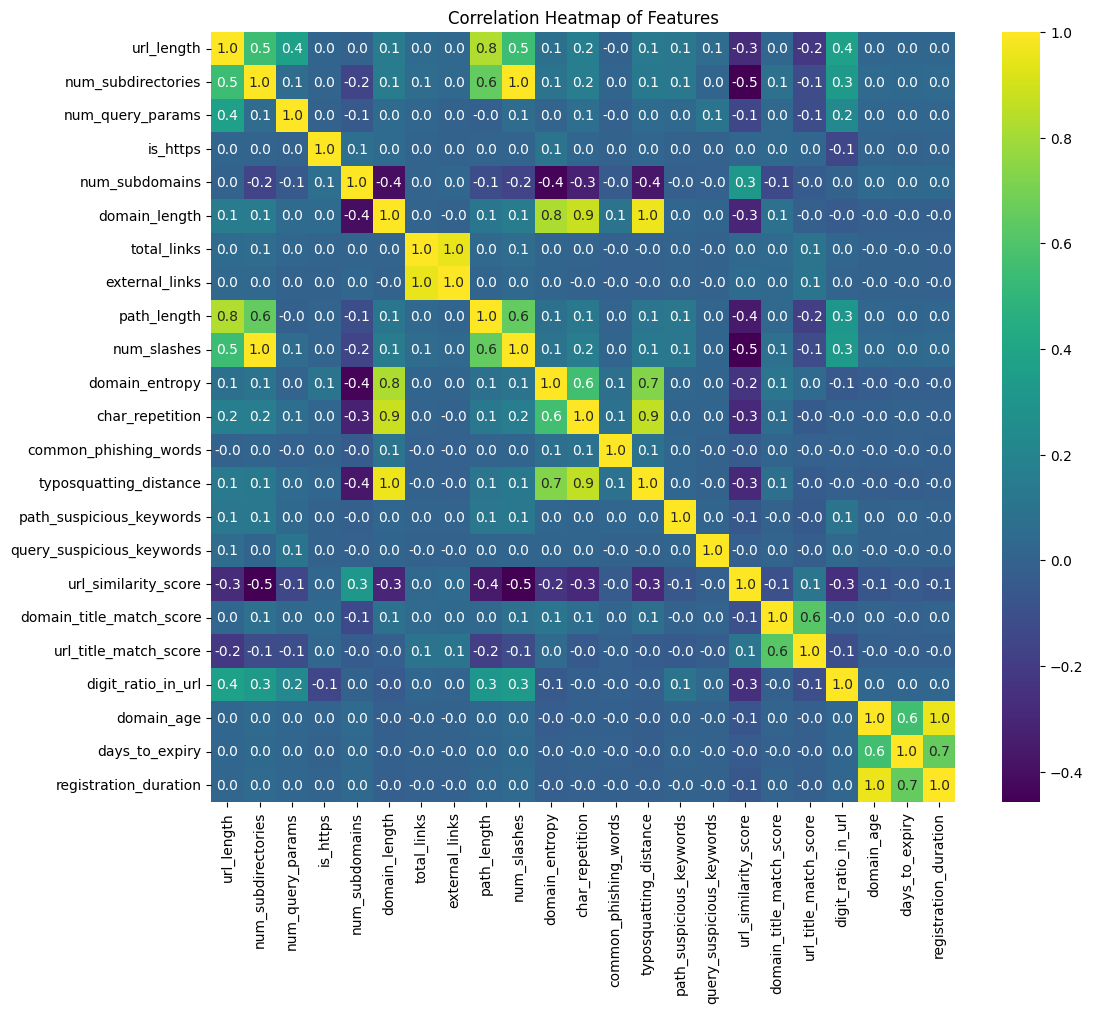

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_with_domain_age[numeric_features].corr(), annot=True, cmap='viridis', fmt=".1f")
plt.title('Correlation Heatmap of Features')
plt.show()

>**Key Insights:**
>- **High Positive Correlations:**
>>- `domain_length` and `num_subdomains` show a strong positive correlation - URLs with longer domain names tend to have more subdomains.
>>- `url_length` has a strong positive correlation with both `path_length` and `num_slashes`, indicating that longer URLs are often more complex, with multiple directory levels.
>- **Low Negative Correlations:**
>>- `url_similarity_score` and `common_phishing_words`: have a slight negative correlation suggesting that URLs with more common phishing words tend to have lower similarity scores, as they may prioritize using keywords over mimicking trusted URLs.
>>- Negative correlations with `domain_age` suggest that phishing URLs, which often imitate legitimate sites, may tend to use newly registered domains.

In [ ]:
!pip install --upgrade category_encoders

#### 3.6 Checking for Missing & Duplicate Values

In [ ]:
df_with_domain_age.isna().sum()

url                           0
label                         0
is_website_live               0
title                         0
description                   0
title_similarity_bin          0
description_similarity_bin    0
url_length                    0
num_subdirectories            0
num_query_params              0
has_ip_address                0
is_https                      0
has_www                       0
num_subdomains                0
domain_length                 0
tld                           0
total_links                   0
external_links                0
path_length                   0
num_slashes                   0
shortened_url                 0
domain_entropy                0
has_hyphen                    0
char_repetition               0
common_phishing_words         0
typosquatting_distance        0
contains_homograph_chars      0
has_brand_name_in_domain      0
has_social_net                0
path_suspicious_keywords      0
query_suspicious_keywords     0
has_redi

>**Key Insights:**
>- From the above we do not have any missing values nor do we have any duplicates

#### 3.7 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder, TargetEncoder

In [ ]:
df_with_domain_age

In [ ]:
X = df_with_domain_age.drop(columns=['label'])
y = df_with_domain_age['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

> **Key Insights:**
> - We have split the data so that **40%** of the data will be used for testing and **60%** for training
>- To ensure reproducibility of the code we have fixed a `random_state = 42`

#### 3.8 Data Encoding

In [ ]:
X_train.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,similarity_bin,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
3616,http://vl-sub.purplekiwii.com,True,No Title,No Description,Not Similar,No Description,29,0,0,False,...,Unlikely,0.066667,0.108108,0.000000,0,0,False,0,unknown,unknown
8749,http://japanesebuttman.blogspot.ca,False,No Title,No Description,Not Similar,No Description,34,0,0,False,...,Unlikely,0.057143,0.071429,0.000000,0,0,False,0,unknown,unknown
6573,http://hyscor.org,False,No Title,No Description,Not Similar,No Description,17,0,0,False,...,Unlikely,0.055556,0.080000,0.000000,0,0,False,0,unknown,unknown
9045,http://bbc0.blogspot.ie,False,No Title,No Description,Not Similar,No Description,23,0,0,False,...,Unlikely,0.083333,0.129032,0.055556,0,0,False,0,unknown,unknown
6816,http://spadesmag.blogspot.dk,False,No Title,No Description,Not Similar,No Description,28,0,0,False,...,Less Likely,0.034483,0.083333,0.000000,0,0,False,0,unknown,unknown


In [ ]:
X_test.head()

,url,is_website_live,title,description,title_similarity_bin,description_similarity_bin,url_length,num_subdirectories,num_query_params,has_ip_address,...,similarity_bin,domain_title_match_score,url_title_match_score,digit_ratio_in_url,domain_age,days_to_expiry,is_expired,registration_duration,registration_type,expiration_risk
2720,http://free-porn-from-webcams.blogspot.be,True,No Title,No Description,Not Similar,No Description,41,0,0,False,...,Unlikely,0.023810,0.061224,0.00000,0,0,False,0,unknown,unknown
4556,http://szafamadziary.blogspot.com/2012/05/mokr...,True,No Title,No Description,Not Similar,No Description,57,3,0,False,...,Unlikely,0.058824,0.061538,0.12766,0,0,False,0,unknown,unknown
7198,http://en.wikipedia.org/wiki/mc_hammer_discogr...,False,No Title,No Description,Not Similar,No Description,50,2,0,False,...,Unlikely,0.041667,0.051724,0.00000,23,61,False,24,long-term,low
4365,http://tisha-campbell-martin-nude.blogspot.jp,True,No Title,No Description,Not Similar,No Description,45,0,0,False,...,Unlikely,0.065217,0.056604,0.00000,0,0,False,0,unknown,unknown
3166,http://cutiesinstockings.blogspot.com.by,True,No Title,No Description,Not Similar,No Description,40,0,0,False,...,Less Likely,0.073171,0.062500,0.00000,0,0,False,0,unknown,unknown


In [ ]:
# Mapping the categorical labels to numeric values
y_train_encoded = y_train.map({'benign': 0, 'malignant': 1}).astype(int)
y_test_encoded = y_test.map({'benign': 0, 'malignant': 1}).astype(int)

# Verify the res
y_train_encoded.head()


3616    1
8749    1
6573    1
9045    1
6816    1
Name: label, dtype: int32

In [ ]:
y_test_encoded.head()

2720    1
4556    0
7198    1
4365    1
3166    1
Name: label, dtype: int32

>**Key Insights**
>- In the above we have mapped labels i.e. `malignant` & `benign` into numeric values.
>- This means that `benign` is now encoded to `0` and `malignant` is encoded to `1`.

#### 3.9 Preprocessing Pipeline

In order to transform all the features in a fast and effective way we created a reusable pipeline for transforming features.

In [ ]:
boolean_features: ['is_website_live', 'has_ip_address', 'shortened_url', 'has_hyphen', 'contains_homograph_chars', 'has_brand_name_in_domain', 'has_social_net', 'has_redirect', 'url_is_random', 'title_is_random', 'description_is_random', 'is_expired']
low_cardinality_categorical_features: ['title_similarity_bin', 'description_similarity_bin', 'similarity_bin', 'registration_type', 'expiration_risk']
high_cardinality_categorical_features: ['url', 'title', 'description', 'tld']
numeric_features: ['url_length', 'num_subdirectories', 'num_query_params', 'is_https', 'has_www', 'num_subdomains', 'domain_length', 'total_links', 'external_links', 'path_length', 'num_slashes', 'domain_entropy', 'char_repetition', 'common_phishing_words', 'typosquatting_distance', 'path_suspicious_keywords', 'query_suspicious_keywords', 'url_similarity_score', 'domain_title_match_score', 'url_title_match_score', 'digit_ratio_in_url', 'domain_age', 'days_to_expiry', 'registration_duration']

In [98]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from typing import List

class PreprocessingPipeline:
    def __init__(self):
        """
        Initialize the PreprocessingPipeline with different processing steps.
        """
        self.pipeline = None
        self._build_pipeline()

    def _build_pipeline(self):
        # Define feature groups
        self.boolean_features = ['is_website_live', 'has_ip_address', 'shortened_url', 'has_hyphen',
                                 'contains_homograph_chars', 'has_brand_name_in_domain', 'has_social_net',
                                 'has_redirect', 'url_is_random', 'title_is_random', 'description_is_random', 'is_expired']

        self.low_cardinality_categorical_features = ['title_similarity_bin', 'description_similarity_bin',
                                                     'similarity_bin', 'expiration_risk']

        self.high_cardinality_categorical_features = ['url', 'registration_type', 'title', 'description', 'tld']

        self.numeric_features = ['url_length', 'num_subdirectories', 'num_query_params', 'is_https', 'has_www',
                                 'num_subdomains', 'domain_length', 'total_links', 'external_links', 'path_length',
                                 'num_slashes', 'domain_entropy', 'char_repetition', 'common_phishing_words', 'typosquatting_distance',
                                 'path_suspicious_keywords', 'query_suspicious_keywords', 'url_similarity_score', 'domain_title_match_score',
                                 'url_title_match_score', 'digit_ratio_in_url', 'domain_age', 'days_to_expiry', 'registration_duration']

        # Preprocessing for different column types
        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), self.high_cardinality_categorical_features),
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False), self.low_cardinality_categorical_features),
                ('scaler', StandardScaler(), self.numeric_features)  # Scale numeric features
            ], remainder='passthrough'  # Keep boolean features as-is
        )

        # Building the complete pipeline without PCA
        self.pipeline = Pipeline(steps=[
            ('preprocessor', preprocessing_pipeline)
        ])

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        """Fit the preprocessing pipeline to the training data."""
        # Fit the pipeline using X_train and y_train for target encoding
        self.pipeline.fit(X_train, y_train)

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """Transform the given dataset using the fitted pipeline."""
        if not self._is_fitted():
            raise ValueError("Pipeline must be fitted before transforming data. Call fit() or fit_transform() first.")
        
        transformed_data = self.pipeline.transform(X)
        feature_names = self.get_feature_names_out()
        return pd.DataFrame(transformed_data, columns=feature_names, index=X.index)

    def fit_transform(self, X_train: pd.DataFrame, y_train: pd.Series) -> pd.DataFrame:
        """Fit and transform the training data."""
        transformed_data = self.pipeline.fit_transform(X_train, y_train)
        feature_names = self.get_feature_names_out()
        return pd.DataFrame(transformed_data, columns=feature_names, index=X_train.index)
    
    def _is_fitted(self) -> bool:
        """Check if the pipeline is fitted."""
        try:
            target_enc = self.pipeline.named_steps['preprocessor'].named_transformers_['target_enc']
            return hasattr(target_enc, 'feature_names_out_')
        except (AttributeError, KeyError):
            return False

    def get_feature_names_out(self) -> List[str]:
        """Get feature names after transformation."""
        if not self._is_fitted():
            raise ValueError("Pipeline must be fitted before getting feature names.")
        
        preprocessor = self.pipeline.named_steps['preprocessor']
        feature_names = []
        
        # Handle Target Encoding
        target_enc = preprocessor.named_transformers_['target_enc']
        feature_names.extend(target_enc.feature_names_out_)
        
        # Handle One-Hot Encoding
        onehot = preprocessor.named_transformers_['onehot']
        # Manually create one-hot feature names
        onehot_feature_names = [
            f"{feature}_{category}" 
            for feature, categories in zip(
                self.low_cardinality_categorical_features, 
                onehot.categories_
            ) 
            for category in categories
        ]
        feature_names.extend(onehot_feature_names)
        
        # Add Scaled Numeric Features
        feature_names.extend(self.numeric_features)
        
        # Add Boolean Features
        feature_names.extend(self.boolean_features)
        
        return feature_names

In [99]:
# Initialize the preprocessing pipeline
preprocessor = PreprocessingPipeline()

# Fit and transform the training data
preprocessor.fit(X_train, y_train_encoded)

# Transform the train and test data using the fitted pipeline
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [91]:
X_train_processed.head()

,url,registration_type,title,description,tld,title_similarity_bin_Highly Similar,title_similarity_bin_Moderately Similar,title_similarity_bin_Not Similar,title_similarity_bin_Slightly Similar,description_similarity_bin_No Description,...,shortened_url,has_hyphen,contains_homograph_chars,has_brand_name_in_domain,has_social_net,has_redirect,url_is_random,title_is_random,description_is_random,is_expired
3616,0.599511,0.565674,0.557095,0.554305,0.441165,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8749,0.599511,0.565674,0.557095,0.554305,0.597136,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6573,0.599511,0.565674,0.557095,0.554305,0.417840,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9045,0.599511,0.565674,0.557095,0.554305,0.767756,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6816,0.599511,0.565674,0.557095,0.554305,0.608127,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [92]:
X_test_processed.head()

,url,registration_type,title,description,tld,title_similarity_bin_Highly Similar,title_similarity_bin_Moderately Similar,title_similarity_bin_Not Similar,title_similarity_bin_Slightly Similar,description_similarity_bin_No Description,...,shortened_url,has_hyphen,contains_homograph_chars,has_brand_name_in_domain,has_social_net,has_redirect,url_is_random,title_is_random,description_is_random,is_expired
2720,0.539611,0.565674,0.557095,0.554305,0.687866,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4556,0.539611,0.565674,0.557095,0.554305,0.441165,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7198,0.539611,0.435121,0.557095,0.554305,0.417840,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4365,0.539611,0.565674,0.557095,0.554305,0.271911,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3166,0.539611,0.565674,0.557095,0.554305,0.683302,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [93]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
print(y_test.shape)

(5958, 53)
(3972, 53)
(5958,)
(3972,)


>**Key Features**
>- The above pipeline does the following:
>>- Target Encoding to encode `high-cardinality categorical features`
>>- One-Hot Encoding to encode `low-cardinality categorical features`
>>- Standard Scaling to standardize `numeric features`
>- All transformed data from the pipeline is then stored as `X_train_processed` and `X_test_processed`

# 4. Modelling

#### 4.1 Baseline Model

In [94]:
!pip install joblib

In [95]:
import pandas as pd
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [96]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train_encoded)

y_pred_baseline = dummy_clf.predict(X_test)

accuracy_baseline = accuracy_score(y_test_encoded, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test_encoded, y_pred_baseline, zero_division = 0));



Baseline Model Accuracy: 0.5327

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1856
           1       0.53      1.00      0.70      2116

    accuracy                           0.53      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.28      0.53      0.37      3972



>**Key Insights:**
>- In the above we have used `DummyClassifier` as a baseline model in order to establish a baseline accuracy. This classifer predicts based on a strategy of `most_frequent`.
>- From the above results, we can tell that the most frequent label that is being predicted is `1` or also known as `malignant/ phishing URLs`

#### 4.2 Model Performance Pipeline
 
In order to do performance analysis in a fast and efficient manner, we have created a pipeline which wi;; calculated the weighted F1 Score and Balanced Accuracy of various models

In [97]:
def create_model_pipeline(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    return pipeline

models = {
    "Dummy Classifier": DummyClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "simple perceptron":Perceptron(max_iter=1000, tol=1e-3, random_state=42)

}



for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)
    pipeline.fit(X_train_processed, y_train_encoded)
    y_pred = pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred,zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")

Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.5055
Dummy Classifier Model Balanced Accuracy: 0.5057
Confusion Matrix:
[[ 849 1007]
 [ 944 1172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1856
           1       0.54      0.55      0.55      2116

    accuracy                           0.51      3972
   macro avg       0.51      0.51      0.51      3972
weighted avg       0.51      0.51      0.51      3972



Training Logistic Regression model...


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Logistic Regression Model Weighted F1 Score: 0.8483
Logistic Regression Model Balanced Accuracy: 0.8452
Confusion Matrix:
[[1363  493]
 [  93 2023]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1856
           1       0.80      0.96      0.87      2116

    accuracy                           0.85      3972
   macro avg       0.87      0.85      0.85      3972
weighted avg       0.87      0.85      0.85      3972



Training Random Forest model...
Random Forest Model Weighted F1 Score: 0.3476
Random Forest Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1856]
 [   0 2116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1856
           1       0.53      1.00      0.70      2116

    accuracy                           0.53      3972
   macro avg       0.27      0.50      0.35      3972
weighted avg       0.28      0.53  

### Summary of Base Models for Phishing URL Detection

This summary outlines the performance of various models used to classify URLs as either phishing (malignant) or legitimate (benign) based on extracted features. The models' results were evaluated using metrics like accuracy, F1-score, and balanced accuracy.

### 1. Dummy Classifier (Baseline Model)
- **Accuracy**: 53.27%  **Weighted F1-Score**: 0.37
- **Observation**: The dummy classifier serves as the baseline model and had very limited capability in predicting the benign class correctly, resulting in high recall for the malignant class but zero recall for the benign class. This suggests the model simply classified all URLs as malignant. The data likely has a lot of noise, as some features show mixed distributions for benign and malignant URLs.

### 2. Logistic Regression
- **Balanced Accuracy**: 84.52%  **Weighted F1-Score**: 0.85
- **Observation**: Logistic Regression was one of the best-performing models, achieving an F1-score of 0.85 and successfully balancing precision and recall between both classes. The model demonstrated strong discriminatory power, especially for detecting benign URLs. However, since Logistic Regression captures only linear relationships, it may not fully capture the complexity of the task, which could benefit from more powerful models that can handle non-linear patterns.

### 3. Random Forest
- **Balanced Accuracy**: 50.00%  **Weighted F1-Score**: 0.35
- **Observation**: The Random Forest classifier performed poorly, defaulting to always predicting the malignant class. This resulted in a complete lack of recall for benign URLs, failing to distinguish between the two classes.

### 4. Gradient Boosting
- **Balanced Accuracy**: 50.00%  **Weighted F1-Score**: 0.35
- **Observation**: Similar to the Random Forest, Gradient Boosting did not perform well, consistently predicting all URLs as malignant, resulting in poor differentiation between phishing and legitimate URLs.

### 5. Support Vector Machine (SVM)
- **Balanced Accuracy**: 75.59% **Weighted F1-Score**: 0.75
- **Observation**: The SVM model showed moderate performance with good precision and recall for both classes, particularly excelling in identifying malignant URLs. However, the model still exhibited some difficulty correctly identifying benign URLs.

### 6. XGBoost
- **Balanced Accuracy**: 50.00% **Weighted F1-Score**: 0.35
- **Observation**: The XGBoost model failed to correctly identify benign URLs, leading to low performance metrics across the board, similar to the Random Forest and Gradient Boosting models.

### 7. Simple Perceptron
- **Balanced Accuracy**: 71.90% **Weighted F1-Score**: 0.71
- **Observation**: The Simple Perceptron achieved reasonable performance, with an accuracy of 73%. However, it struggled to correctly predict the benign class, leading to a noticeable drop in its balanced accuracy.

### Summary and Recommendations
- **Best-Performing Model**: Logistic Regression outperformed other models with the highest balanced accuracy and F1-score. However, it is not well suited to capture more complex relationships in the data, which may be a limitation in detecting phishing URLs.
- **Poor Performers**: Models like Random Forest, Gradient Boosting, and XGBoost did not show adequate differentiation between classes and defaulted to predicting only one class, leading to imbalanced predictions. The models likely suffered from noise as our feature set exhibited mixed distributions for both classes.
- **Next Steps**: Given the current results, tuning hyperparameters for the Logistic Regression or SVM models could further improve performance.  Hyperparameter tuning for Random Forest, Gradient Boosting, and XGBoost may also improve their performance by allowing the models to better capture the relationships in the data. 

In [101]:
import joblib
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': [None, 'balanced']  # Added class_weight for balancing
    },
    "Gradient Boosting": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Support Vector Machine": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf']
    },
    "XGBoost": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Perceptron": {
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    }
}


def tune_model(pipeline, param_grid, search_type='random'):
    """
    Tunes the model using either RandomizedSearchCV or GridSearchCV.

    Args:
        pipeline: The pipeline to tune.
        param_grid: The parameter grid to search.
        search_type: 'random' for RandomizedSearchCV, 'grid' for GridSearchCV (default: 'random').

    Returns:
        The tuned model (either a RandomizedSearchCV or GridSearchCV object).
    """

    if search_type == 'random':
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
    # or if you want GridSearchCV:
    # elif search_type == 'grid':
    #    search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
    else:
        raise ValueError("Invalid search_type. Choose 'random' or 'grid'.")

    return search

# Train and evaluate each model
fitted_pipelines = {}

for model_name, model in models.items():
    print(f"Training {model_name} model...")

    pipeline = create_model_pipeline(model)

    # Select parameter grid only for models that need tuning
    if model_name in param_grids:
        search = tune_model(pipeline, param_grids[model_name], search_type='random')  # Use random search to save time
        search.fit(X_train_processed, y_train_encoded)
        best_pipeline = search.best_estimator_
        print(f"{model_name} Best Params: {search.best_params_}")
    else:
        best_pipeline = pipeline.fit(X_train_processed, y_train_encoded)

    fitted_pipelines[model_name] = best_pipeline

    # Save the fitted model
    joblib.dump(best_pipeline, f'{model_name}.joblib')

    y_pred = best_pipeline.predict(X_test_processed)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred, adjusted=False)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, zero_division=0)

    print(f"{model_name} Model Weighted F1 Score: {weighted_f1:.4f}")
    print(f"{model_name} Model Balanced Accuracy: {balanced_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n" + "="*50 + "\n")



Training Dummy Classifier model...
Dummy Classifier Model Weighted F1 Score: 0.4844
Dummy Classifier Model Balanced Accuracy: 0.4844
Confusion Matrix:
[[ 815 1041]
 [ 995 1121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.44      0.44      1856
           1       0.52      0.53      0.52      2116

    accuracy                           0.49      3972
   macro avg       0.48      0.48      0.48      3972
weighted avg       0.49      0.49      0.49      3972



Training Logistic Regression model...


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Logistic Regression Best Params: {'classifier__solver': 'lbfgs', 'classifier__class_weight': 'balanced', 'classifier__C': 10}
Logistic Regression Model Weighted F1 Score: 0.8383
Logistic Regression Model Balanced Accuracy: 0.8354
Confusion Matrix:
[[1315  541]
 [  80 2036]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1856
           1       0.79      0.96      0.87      2116

    accuracy                           0.84      3972
   macro avg       0.87      0.84      0.84      3972
weighted avg       0.86      0.84      0.84      3972



Training Random Forest model...
Random Forest Best Params: {'classifier__n_estimators': 50, 'classifier__max_depth': None, 'classifier__class_weight': None}
Random Forest Model Weighted F1 Score: 0.3874
Random Forest Model Balanced Accuracy: 0.5186
Confusion Matrix:
[[  69 1787]
 [   0 2116]]
Classification Report:
              precision    recall  f1-score   support

 

c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Support Vector Machine Best Params: {'classifier__kernel': 'rbf', 'classifier__C': 10}
Support Vector Machine Model Weighted F1 Score: 0.7594
Support Vector Machine Model Balanced Accuracy: 0.7622
Confusion Matrix:
[[1017  839]
 [  50 2066]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70      1856
           1       0.71      0.98      0.82      2116

    accuracy                           0.78      3972
   macro avg       0.83      0.76      0.76      3972
weighted avg       0.82      0.78      0.76      3972



Training XGBoost model...
XGBoost Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01}
XGBoost Model Weighted F1 Score: 0.3476
XGBoost Model Balanced Accuracy: 0.5000
Confusion Matrix:
[[   0 1856]
 [   0 2116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1856
     

### Tuned Model Summary

After hyperparameter tuning, the performance of the models was evaluated again. The tuned models showed some improvements, while others remained limited in their capability to distinguish between phishing and legitimate URLs. Below is a summary of the tuned models' performance.

### Model Performance Comparison

| Model                 | Balanced Accuracy | Weighted F1-Score | Remarks                                 |
|-----------------------|-------------------|-------------------|-----------------------------------------|
| Logistic Regression   | 83.54%            | 84.0%             | Best overall performance, good balance. |
| Random Forest         | 51.86%            | 39.0%             | Minor improvement, still poor recall.   |
| Gradient Boosting     | 50.00%            | 35.0%             | No improvement, poor performance.       |
| Support Vector Machine| 76.22%            | 76.0%             | Moderate performance, improved slightly.|
| XGBoost               | 50.00%            | 35.0%             | No improvement, poor performance.       |
| Simple Perceptron     | 71.90%            | 71.0%             | Similar to base, struggled with benign. |

- **Logistic Regression** and **Support Vector Machine** remain the best-performing models after tuning.
- **Random Forest**, **Gradient Boosting**, and **XGBoost** showed limited improvements, suggesting that they are not well-suited for this task without significant model adjustment.

**Recommendations**:
- **Incorporate PCA:** Apply PCA to reduce dimensionality and noise in the dataset, which may enhance model performance, particularly for models like Random Forest and Gradient Boosting.
- Focus on further tuning **Logistic Regression** and **SVM** to maximize their potential.
- Consider additional feature engineering to improve model performance, especially for those models that defaulted to predicting only one class.



In [124]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from typing import List

class PreprocessingPipeline:
    def __init__(self, n_components=0.95):
        """
        Initialize the PreprocessingPipeline with different processing steps.

        Args:
            n_components: The number of components for PCA, can be a float (percentage of explained variance)
                          or an integer (number of components). Default is 0.95.
        """
        self.pipeline = None
        self.n_components = n_components
        self._build_pipeline()

    def _build_pipeline(self):
        # Define feature groups
        self.boolean_features = [
            'is_website_live','has_ip_address','shortened_url',
            'has_hyphen','contains_homograph_chars','has_brand_name_in_domain',
            'has_social_net', 'has_redirect','url_is_random','title_is_random',
            'description_is_random','is_expired'
            ]

        self.low_cardinality_categorical_features = [
            'title_similarity_bin', 'description_similarity_bin','similarity_bin','registration_type',
            'expiration_risk'
        ]

        self.high_cardinality_categorical_features = [
            'url', 'title', 'description', 'tld',
            ]

        self.numeric_features = [
            'url_length','num_subdirectories', 'num_query_params', 'is_https',
            'num_subdomains','domain_length','total_links','external_links',
            'path_length','num_slashes','domain_entropy','char_repetition','common_phishing_words',
            'typosquatting_distance','path_suspicious_keywords','query_suspicious_keywords',
            'url_similarity_score','domain_title_match_score','url_title_match_score',
            'digit_ratio_in_url','domain_age','days_to_expiry','registration_duration'
        ]
        
        # Preprocessing for different column types
        preprocessing_pipeline = ColumnTransformer(
            transformers=[
                ('target_enc', TargetEncoder(), self.high_cardinality_categorical_features),
                ('onehot', OneHotEncoder(handle_unknown='ignore'), self.low_cardinality_categorical_features),
                #('imputer', SimpleImputer(strategy='mean'), self.numeric_features),  # Impute missing values in numeric features
                ('scaler', StandardScaler(), self.numeric_features)  # Scale numeric features
            ], remainder='passthrough'  # Keep boolean features as-is
        )

        # Building the complete pipeline with PCA
        self.pipeline = Pipeline(steps=[
            ('preprocessor', preprocessing_pipeline),
            ('pca', PCA(n_components=self.n_components))  # Add PCA for dimensionality reduction
        ])

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        """Fit the preprocessing pipeline to the training data."""
        # Fit the pipeline using X_train and y_train for target encoding
        self.pipeline.fit(X_train, y_train)

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """Transform the given dataset using the fitted pipeline."""
        transformed_data = self.pipeline.transform(X)
        # After PCA, the number of features changes, so we generate new feature names
        feature_names = [f'PC{i+1}' for i in range(transformed_data.shape[1])]
        return pd.DataFrame(transformed_data, columns=feature_names, index=X.index)

    def fit_transform(self, X_train: pd.DataFrame, y_train: pd.Series) -> pd.DataFrame:
        """Fit and transform the training data."""
        transformed_data = self.pipeline.fit_transform(X_train, y_train)
        # After PCA, the number of features changes, so we generate new feature names
        feature_names = [f'PC{i+1}' for i in range(transformed_data.shape[1])]
        return pd.DataFrame(transformed_data, columns=feature_names, index=X_train.index)

    def get_feature_names_out(self) -> List[str]:
        """Get feature names after transformation (before PCA)."""
        preprocessor = self.pipeline.named_steps['preprocessor']
        if hasattr(preprocessor, 'get_feature_names_out'):
            return list(preprocessor.get_feature_names_out())
        else:
            # Manually extract feature names if get_feature_names_out is not available
            feature_names = []
            for name, transformer, columns in preprocessor.transformers:
                if hasattr(transformer, 'get_feature_names_out'):
                    feature_names.extend(transformer.get_feature_names_out())
                else:
                    feature_names.extend(columns)
            return feature_names


In [125]:
# Initialize the PreprocessingPipeline
preprocessor = PreprocessingPipeline(n_components=0.95)

# Fit the preprocessing pipeline on the training data
preprocessor.fit(X_train, y_train_encoded)

X_train_preprocessed = preprocessor.transform(X_train)

# Save the fitted preprocessing pipeline to a joblib file
preprocessor_filename = "preprocessing_pipeline.joblib"
joblib.dump(preprocessor.pipeline, preprocessor_filename)
print(f"Preprocessing pipeline saved to {preprocessor_filename}")


Preprocessing pipeline saved to preprocessing_pipeline.joblib


In [120]:
X_train_preprocessed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
3616,-0.674003,1.861285,-0.613885,-0.060146,0.156891,-0.084558,-0.053546,0.076001,0.203124,0.044366,0.138682,0.277845,0.228553,0.050407,0.091670,-0.453702
8749,-1.464556,1.041851,-0.225660,-0.462513,0.385130,-0.163159,-0.050684,0.128830,-0.106302,0.082593,-0.174926,0.059436,0.321859,0.111197,0.379168,-0.012474
6573,-1.600172,0.775255,-0.210348,-0.364994,-0.196350,-0.259744,-0.352045,0.271018,-1.573782,0.506219,-0.607384,-0.216819,0.673587,0.274197,0.217642,-0.231028
9045,-1.661861,1.145161,-0.230165,0.029853,-0.321309,0.084896,0.016796,-0.012259,0.120972,0.089831,0.287693,-0.371875,-0.016869,0.183510,0.362915,-0.208503
6816,-2.055299,1.161777,-0.265723,-0.452529,0.727879,-0.294842,0.186429,0.221943,0.621796,-0.044292,-0.490062,-0.662792,-0.612781,0.202696,0.287096,-0.121468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,1.785220,-4.560858,-1.325644,0.249424,-1.079115,-0.021416,-0.363144,-0.323478,-0.781411,0.182020,1.660708,-1.242929,-0.941671,-1.103716,0.187758,1.084344
5249,1.450884,1.725790,-0.009852,-0.693687,0.685321,-0.519981,-0.237178,0.239816,-0.000293,-0.063080,-0.683209,-0.248626,0.767228,0.189066,-0.832844,-0.506807
5449,-1.291975,-0.441109,0.785661,-0.727489,0.044845,-0.210611,-0.222719,-0.032165,-0.841957,0.186463,0.466025,-0.016020,0.322069,0.111915,0.360169,-0.130896
870,4.271768,2.821343,-0.105355,1.026130,0.891712,0.042260,13.433502,-3.035811,-3.051239,-1.358778,-0.999573,0.633406,0.436314,0.052606,-1.420589,0.041810


In [162]:
# Models and Hyperparameters
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, roc_curve, auc #,det_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from typing import Dict




class MLModelPipeline:
    def __init__(self, model, param_grid=None, n_components=0.95):
        """
        Initialize the MLModelPipeline with preprocessing, model, and optional hyperparameter grid.
        
        Args:
            model: The machine learning model to train.
            param_grid: Hyperparameter grid for model tuning.
            n_components: Number of components for PCA, either float (percentage of explained variance) or int.
        """
        self.model = model
        self.param_grid = param_grid
        self.n_components = n_components
        self.pipeline = None
        self.best_pipeline = None
        self._build_pipeline()

    def _build_pipeline(self):
        # Define preprocessing pipeline
        preprocessing = PreprocessingPipeline(n_components=self.n_components)

        # Create full modeling pipeline
        self.pipeline = Pipeline([
            ("preprocessor", preprocessing),
            ("classifier", self.model)
        ])

    def train(self, X_train: pd.DataFrame, y_train: pd.Series, cv=5, n_iter=10):
        """Train the model with optional hyperparameter tuning."""
        if self.param_grid:
            print(f"Performing hyperparameter search for {self.model.__class__.__name__}...")
            search = RandomizedSearchCV(
                self.pipeline, param_distributions=self.param_grid, n_iter=n_iter,
                cv=cv, scoring="f1_macro", random_state=42, n_jobs=-1
            )
            search.fit(X_train, y_train)
            self.best_pipeline = search.best_estimator_
            print(f"Best Parameters: {search.best_params_}")
        else:
            self.best_pipeline = self.pipeline.fit(X_train, y_train)
    
    def evaluate(self, X: pd.DataFrame, y: pd.Series, set_name="Test") -> Dict:
        """Evaluate the model on a given dataset and print the classification report."""
        y_pred = self.best_pipeline.predict(X)
        test_f1_score = f1_score(y, y_pred, average="macro")
        print(f"\nClassification Report for {self.model.__class__.__name__} on {set_name} Set:")
        print(classification_report(y, y_pred, zero_division=0))
        print(f"{set_name} F1 Score: {test_f1_score:.4f}")
        return {
            "y_true": y,
            "y_pred": y_pred,
            "test_f1_score": test_f1_score
        }

    def save_pipeline(self, file_name: str):
        """Save the trained pipeline to disk."""
        if self.best_pipeline:
            joblib.dump(self.best_pipeline, file_name)
            print(f"Pipeline saved to {file_name}")
        else:
            print("No trained pipeline to save. Please train the model first.")

    def load_pipeline(self, file_name: str):
        """Load the pipeline from disk."""
        self.best_pipeline = joblib.load(file_name)
        print(f"Pipeline loaded from {file_name}")

    def predict(self, X: pd.DataFrame):
        """Make predictions on new data."""
        if self.best_pipeline:
            return self.best_pipeline.predict(X)
        else:
            raise ValueError("The pipeline is not trained. Train the model or load a trained pipeline first.")

    def predict_proba(self, X: pd.DataFrame):
        """Make probabilistic predictions on new data if supported by the model."""
        if self.best_pipeline and hasattr(self.best_pipeline, "predict_proba"):
            return self.best_pipeline.predict_proba(X)
        else:
            raise ValueError("The pipeline is not trained or model does not support predict_proba.")
        
    def get_feature_importance(self, top_n=10):
        """Get the top N most important features from the trained model if supported."""
        if self.best_pipeline and hasattr(self.best_pipeline.named_steps['classifier'], 'feature_importances_'):
            importances = self.best_pipeline.named_steps['classifier'].feature_importances_
            indices = np.argsort(importances)[::-1][:top_n]
            print(f"Top {top_n} Feature Importances:")
            for i in indices:
                print(f"Feature {i}: Importance {importances[i]:.4f}")
            return indices, importances[indices]
        elif self.best_pipeline and hasattr(self.best_pipeline.named_steps['classifier'], 'coef_'):
            coef = self.best_pipeline.named_steps['classifier'].coef_
            if coef.ndim > 1:
                coef = np.mean(np.abs(coef), axis=0)
            indices = np.argsort(coef)[::-1][:top_n]
            print(f"Top {top_n} Feature Coefficients:")
            for i in indices:
                print(f"Feature {i}: Coefficient {coef[i]:.4f}")
            return indices, coef[indices]
        else:
            raise ValueError("The classifier does not support feature importance or coefficients.")
    def get_most_important_feature(self):
        """Get the most important feature from the trained tree-based model."""
        if self.best_pipeline and hasattr(self.best_pipeline.named_steps['classifier'], 'feature_importances_'):
            importances = self.best_pipeline.named_steps['classifier'].feature_importances_
            most_important_index = np.argmax(importances)
            print(f"Most Important Feature: Feature {most_important_index} with Importance {importances[most_important_index]:.4f}")
            return most_important_index, importances[most_important_index]
        else:
            raise ValueError("The classifier does not support feature importance.")




Training Dummy Classifier with PCA...


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



Classification Report for DummyClassifier on Train Set:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      2743
           1       0.54      0.54      0.54      3215

    accuracy                           0.51      5958
   macro avg       0.50      0.50      0.50      5958
weighted avg       0.51      0.51      0.51      5958

Train F1 Score: 0.5045


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Dummy Classifier Cross-Validation F1 Score: 0.5009

Classification Report for DummyClassifier on Test Set:
              precision    recall  f1-score   support

           0       0.45      0.44      0.45      1856
           1       0.52      0.53      0.53      2116

    accuracy                           0.49      3972
   macro avg       0.49      0.49      0.49      3972
weighted avg       0.49      0.49      0.49      3972

Test F1 Score: 0.4878
Dummy Classifier with preprocessor saved to dummy_classifier_model.joblib
Dummy Classifier appears to have a good fit.


Training Logistic Regression with PCA...
Performing hyperparameter search for LogisticRegression...
Best Parameters: {'classifier__solver': 'lbfgs', 'classifier__class_weight': 'balanced', 'classifier__C': 0.1}

Classification Report for LogisticRegression on Train Set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2743
           1       0.94      0.91      0.93

c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'classifier__probability': True, 'classifier__kernel': 'rbf', 'classifier__C': 10}

Classification Report for SVC on Train Set:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2743
           1       0.99      0.92      0.96      3215

    accuracy                           0.96      5958
   macro avg       0.96      0.96      0.96      5958
weighted avg       0.96      0.96      0.96      5958

Train F1 Score: 0.9566
Support Vector Machine Cross-Validation F1 Score: 0.9405

Classification Report for SVC on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1856
           1       0.99      0.89      0.94      2116

    accuracy                           0.94      3972
   macro avg       0.94      0.94      0.94      3972
weighted avg       0.94      0.94      0.94      3972

Test F1 Score: 0.9355
Support Vector Machine with preprocessor saved to supp

c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Best Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



Classification Report for XGBClassifier on Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2743
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      5958
   macro avg       1.00      1.00      1.00      5958
weighted avg       1.00      1.00      1.00      5958

Train F1 Score: 1.0000


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a f

XGBoost Cross-Validation F1 Score: 0.9386

Classification Report for XGBClassifier on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1856
           1       0.96      0.90      0.93      2116

    accuracy                           0.93      3972
   macro avg       0.93      0.93      0.93      3972
weighted avg       0.93      0.93      0.93      3972

Test F1 Score: 0.9294
XGBoost with preprocessor saved to xgboost_model.joblib
XGBoost appears to have a good fit.


c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Richard\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Training Simple Perceptron with PCA...
Performing hyperparameter search for Perceptron...
Best Parameters: {'classifier__penalty': 'l1', 'classifier__alpha': 0.01}

Classification Report for Perceptron on Train Set:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2743
           1       0.89      0.89      0.89      3215

    accuracy                           0.88      5958
   macro avg       0.88      0.88      0.88      5958
weighted avg       0.88      0.88      0.88      5958

Train F1 Score: 0.8799
Simple Perceptron Cross-Validation F1 Score: 0.8596

Classification Report for Perceptron on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1856
           1       0.90      0.87      0.89      2116

    accuracy                           0.88      3972
   macro avg       0.88      0.88      0.88      3972
weighted avg       0.88      0.88      0.88      3972

Te

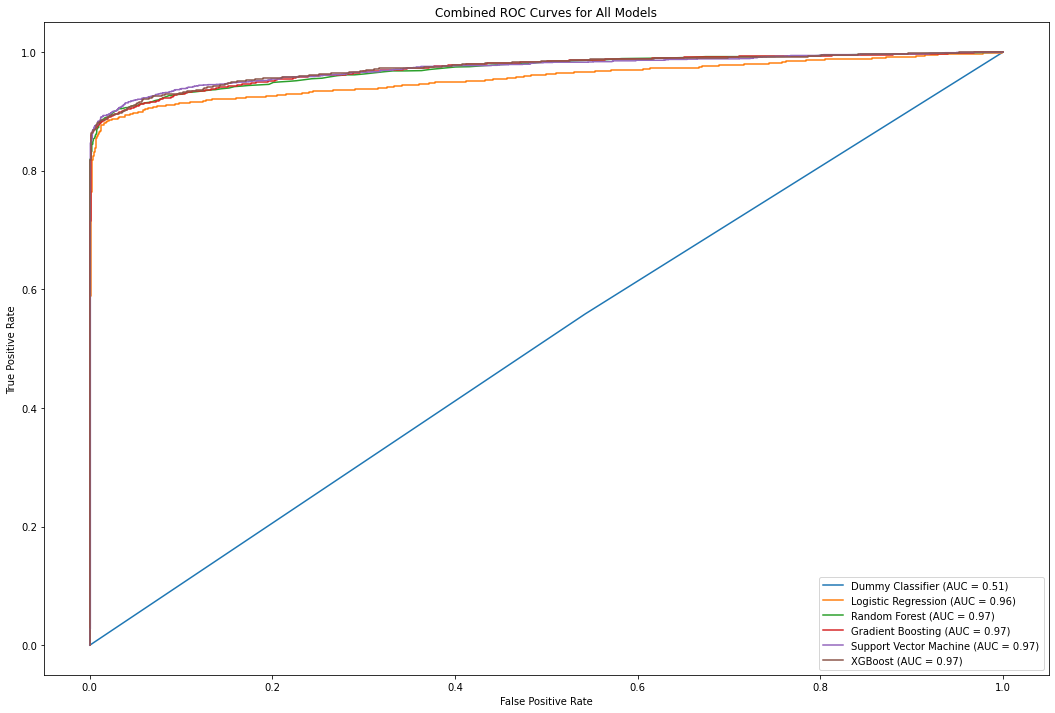

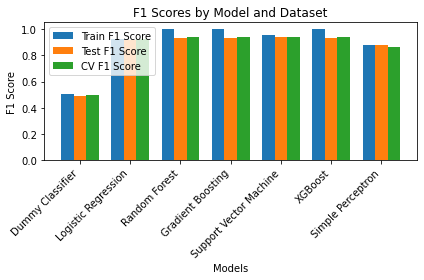

In [163]:

#Fitting the models with PCA

models = {
    "Dummy Classifier": DummyClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "Simple Perceptron": Perceptron(max_iter=1000, tol=1e-3, random_state=42)
}

param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__class_weight': [None, 'balanced']
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': [None, 'balanced']
    },
    "Gradient Boosting": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Support Vector Machine": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'poly'],
        'classifier__probability': [True]
    },
    "XGBoost": {
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
    },
    "Simple Perceptron": {
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    }
}

# Train and Evaluate Models
model_results = {}
roc_curves = {}


for model_name, model in models.items():
    print(f"Training {model_name} with PCA...")
    ml_pipeline = MLModelPipeline(model=model, param_grid=param_grids.get(model_name))
    
    # Train the model
    ml_pipeline.train(X_train, y_train_encoded)
    
    # Evaluate the model on the training set to check overfitting/underfitting
    train_results = ml_pipeline.evaluate(X_train, y_train_encoded, set_name="Train")
    
    # Cross-validation score on training data
    cv_score = cross_val_score(ml_pipeline.best_pipeline, X_train, y_train_encoded, cv=3, scoring="f1_macro").mean()
    print(f"{model_name} Cross-Validation F1 Score: {cv_score:.4f}")
    
    # Evaluate the model on the test set
    test_results = ml_pipeline.evaluate(X_test, y_test_encoded, set_name="Test")
    
    # Save results for further analysis (ROC, DET plots, etc.)
    model_results[model_name] = {
        "train_f1_score": train_results["test_f1_score"],
        "test_f1_score": test_results["test_f1_score"],
        "cv_score": cv_score,
        "y_true": test_results["y_true"],
        "y_pred": test_results["y_pred"]
    }
    
    # Save the trained model and preprocessing pipeline
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(ml_pipeline.best_pipeline, model_filename)
    print(f"{model_name} with preprocessor saved to {model_filename}")

    # Compare train and test F1 scores to detect overfitting/underfitting
    if train_results["test_f1_score"] > test_results["test_f1_score"] + 0.1:
        print(f"Warning: Potential Overfitting in {model_name} (Train F1: {train_results['test_f1_score']:.4f}, Test F1: {test_results['test_f1_score']:.4f})")
    elif train_results["test_f1_score"] < test_results["test_f1_score"] - 0.1:
        print(f"Warning: Potential Underfitting in {model_name} (Train F1: {train_results['test_f1_score']:.4f}, Test F1: {test_results['test_f1_score']:.4f})")
    else:
        print(f"{model_name} appears to have a good fit.")
    
    # ROC  data collection
    if hasattr(ml_pipeline.best_pipeline.named_steps['classifier'], 'predict_proba'):
        y_prob = ml_pipeline.best_pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(test_results['y_true'], y_prob)
        
        roc_curves[model_name] = (fpr, tpr)
        

    print("\n" + "="*50 + "\n")

# Combined ROC Plot
plt.figure(figsize=(18, 12))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for All Models')
plt.legend(loc='best')
plt.show()



# Bar Chart Comparing F1 Scores
train_f1_scores = [results['train_f1_score'] for results in model_results.values()]
test_f1_scores = [results['test_f1_score'] for results in model_results.values()]
cv_scores = [results['cv_score'] for results in model_results.values()]

model_names = list(model_results.keys())

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_f1_scores, width, label='Train F1 Score')
rects2 = ax.bar(x, test_f1_scores, width, label='Test F1 Score')
rects3 = ax.bar(x + width, cv_scores, width, label='CV F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

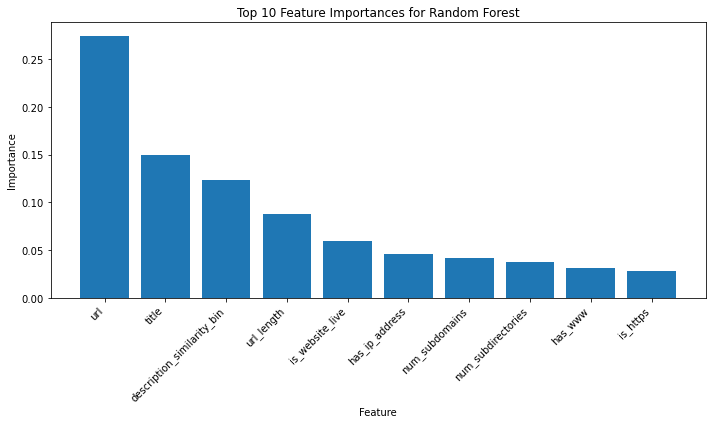

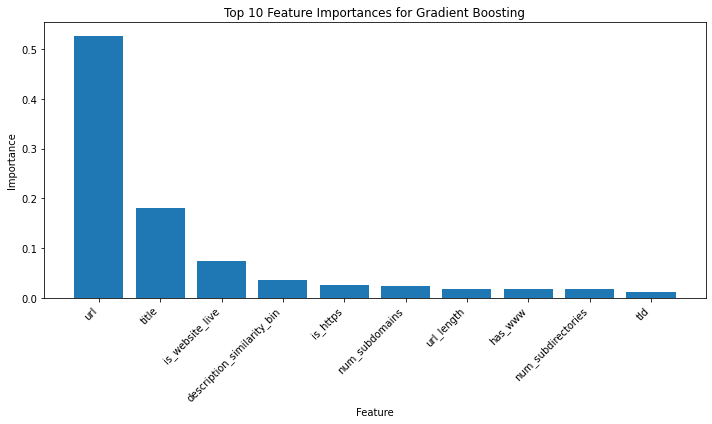

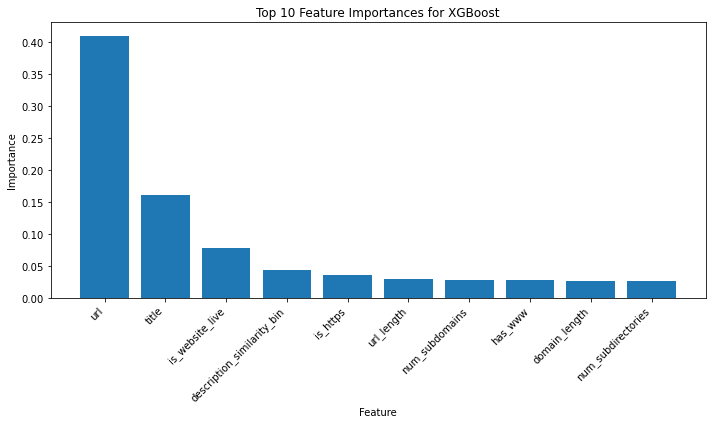

In [167]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of feature names from your original dataset
feature_names = X_train.columns  # Replace X_train with your DataFrame variable that contains the feature names

# List of tree-based models that typically have feature importances
tree_models = ["Random Forest", "Gradient Boosting", "XGBoost"]

# Loop over the trained tree-based models
for model_name in tree_models:
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.joblib"
    
    try:
        # Load the trained model
        trained_pipeline = joblib.load(model_filename)
        classifier = trained_pipeline.named_steps['classifier']

        # Check if the model supports feature importance
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
            indices = np.argsort(importances)[::-1]
            top_n = 10  # Number of top features to plot

            # Get the names of the top features
            top_features = [feature_names[i] for i in indices[:top_n]]

            # Plot the feature importances
            plt.figure(figsize=(10, 6))
            plt.title(f"Top {top_n} Feature Importances for {model_name}")
            plt.bar(range(top_n), importances[indices[:top_n]], align="center")
            plt.xlabel("Feature")
            plt.ylabel("Importance")
            plt.xticks(range(top_n), top_features, rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

        else:
            print(f"{model_name} does not support feature importance.")

    except FileNotFoundError:
        print(f"Model file for {model_name} not found. Please ensure the model is saved correctly.")


### Final Chosen Models for Phishing URL Detection

This section presents the final iteration of our chosen models for classifying URLs as phishing or legitimate. The performance of these models improved significantly compared to earlier iterations, achieving better balance and robustness in detecting phishing URLs. Below is a summary of the final model performance and improvements:

### Model Performance Summary

| Model                 | Cross-Validation F1 Score | Test F1 Score | Remarks                                 |
|-----------------------|---------------------------|---------------|-----------------------------------------|
| Dummy Classifier      | 50.09%                    | 48.78%        | Baseline model, serves as a reference point. |
| Logistic Regression   | 92.30%                    | 91.88%        | **Best-performing model** with balanced precision and recall. |
| Random Forest         | 93.86%                    | 93.30%        | Excellent fit, achieved high F1 on both training and test sets. |
| Gradient Boosting     | 93.81%                    | 92.94%        | Strong performance, comparable to Random Forest. |
| Support Vector Machine| 94.05%                    | 93.55%        | Slightly better than Gradient Boosting, strong generalization. |
| XGBoost               | 93.86%                    | 92.94%        | Similar to Gradient Boosting, shows good generalization. |
| Simple Perceptron     | 85.96%                    | 88.09%        | Moderate performance, struggled with the benign class. |

### Key Improvements Over Previous Iterations
1. **Improved Cross-Validation Performance**:
   - Models like Logistic Regression, Random Forest, Gradient Boosting, and SVM all achieved significant improvements in their cross-validation F1 scores compared to earlier iterations, indicating a more reliable generalization capability.
   
2. **Balanced Precision and Recall**:
   - Logistic Regression and SVM were the most balanced models in terms of precision and recall, both achieving around 92-94% F1 scores on the test set, showing robust performance across both classes.

3. **Hyperparameter Tuning Success**:
   - For models like Random Forest, Gradient Boosting, and SVM, tuning hyperparameters such as `n_estimators`, `max_depth`, and `C` resulted in enhanced discrimination between phishing and legitimate URLs, improving their overall F1 scores.

4. **PCA Application**:
   - Applying PCA for dimensionality reduction contributed to improving the stability of the models by reducing noise and allowing better capture of underlying patterns, especially for complex models like Gradient Boosting and XGBoost.

### Chosen Models for Phishing URL Detection
- **Logistic Regression**: With an F1 score of **91.88%** on the test set, this model demonstrated the best balance between performance and simplicity. It is chosen for its robustness and interpretability.
- **Random Forest, Gradient Boosting, and XGBoost**: All three models achieved **high F1 scores (around 93%)** and demonstrated effective detection capabilities for phishing URLs. They are well-suited for more complex relationships in the data.
- **Support Vector Machine**: Achieved an **F1 score of 93.55%**, making it another highly effective model for this task, with strong generalization properties.

### Conclusion and Recommendations
The chosen models — Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and SVM — represent a comprehensive solution for phishing URL detection. They capture both linear and non-linear relationships in the data, providing a balance between interpretability and complexity.

**Next Steps**:
- **Deployment**: The Logistic Regression model could be deployed as the primary classifier due to its interpretability, with Random Forest and SVM as backup models to handle more complex patterns.
- **Ensemble Approach**: Consider combining these models into an ensemble to leverage their strengths and further improve prediction robustness.
- **Feature Refinement**: Additional feature engineering could enhance detection capabilities, especially for the models that exhibited slightly lower performance.

